# Time Series Modelling

This section involves training, validation and making future forecast from 2025 to 2030 for GDP of five countries with highest average GDP.

The choice of the models to use was influenced by reviewed studies. The models include a baseline model, ARIMA and BSTS
Evaluation of the models will be based on the following metrics

MAPE (Mean Absolute Percentage Error)
Measures the average size of errors as a percentage of the true values. Lower MAPE means the model’s predictions are closer to the actual values in relative terms.

R2 (Coefficient of Determination)
Indicates how much of the variance in the target variable is explained by the model. Values closer to 1 mean better explanatory power.

MAE (Mean Absolute Error)
Measures the average absolute difference between predicted and actual values. Lower MAE means the model’s predictions are closer to the true values on average.


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
cleaned_df = pd.read_csv('world_bank_data_2025_cleaned.csv')
cleaned_df

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,Zimbabwe,zw,2020,557.201817,2.686794e+10,1730.413489,8.621,-81.132121,604.945864,-7.816951,4.080178,NaN,NaN,NaN,2.632974e+10,NaN
3215,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN
3216,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN
3217,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN


In [ ]:
country_perf = (
    cleaned_df.groupby('country_name')
    .agg({
        'GDP (Current USD)': 'mean',
        'GDP per Capita (Current USD)': 'mean',
        'GDP Growth (% Annual)': 'mean'
    })
    .reset_index()
)
#sort by GDP  as a proxy for performance
top5 = country_perf.sort_values(by='GDP (Current USD)', ascending=False).head(5)
top5

,country_name,GDP (Current USD),GDP per Capita (Current USD),GDP Growth (% Annual)
203,United States,2.054985e+13,63062.273383,2.569145
40,China,1.279506e+13,9180.337851,6.733359
96,Japan,5.032637e+12,39729.587204,0.588962
72,Germany,3.935740e+12,47823.703412,1.556436
202,United Kingdom,2.913646e+12,44173.004577,2.062839


In [ ]:
top_5_countries = top5['country_name'].tolist()
top_5_countries

['United States', 'China', 'Japan', 'Germany', 'United Kingdom']

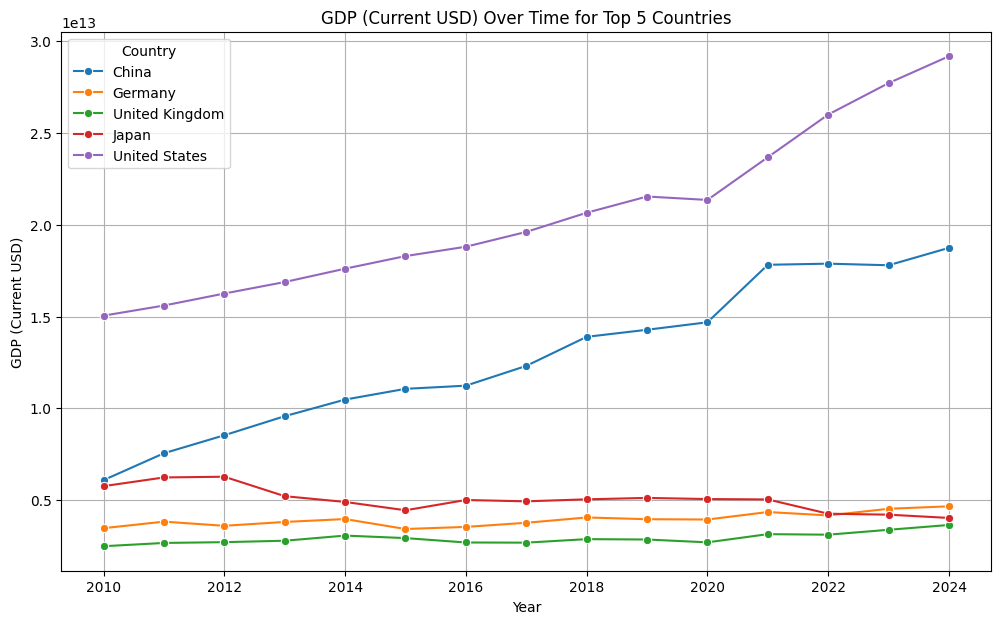

In [ ]:
filtered_df = cleaned_df[cleaned_df['country_name'].isin(top_5_countries)]

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=filtered_df,
    x='year',
    y='GDP (Current USD)',
    hue='country_name',
    marker='o'
)
plt.title('GDP (Current USD) Over Time for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

## USA

In [ ]:
us_gdp_data = cleaned_df[cleaned_df['country_name'] == 'United States'][['year', 'GDP (Current USD)']].copy()
us_gdp_data['year'] = pd.to_datetime(us_gdp_data['year'], format='%Y')
us_gdp_data = us_gdp_data.set_index('year').sort_index()
us_gdp_data.rename(columns={'GDP (Current USD)': 'GDP'}, inplace=True)
us_gdp_data

,GDP
year,
2010-01-01,1.504897e+13
2011-01-01,1.559973e+13
2012-01-01,1.625397e+13
2013-01-01,1.688068e+13
2014-01-01,1.760814e+13
2015-01-01,1.829502e+13
2016-01-01,1.880491e+13
2017-01-01,1.961210e+13
2018-01-01,2.065652e+13


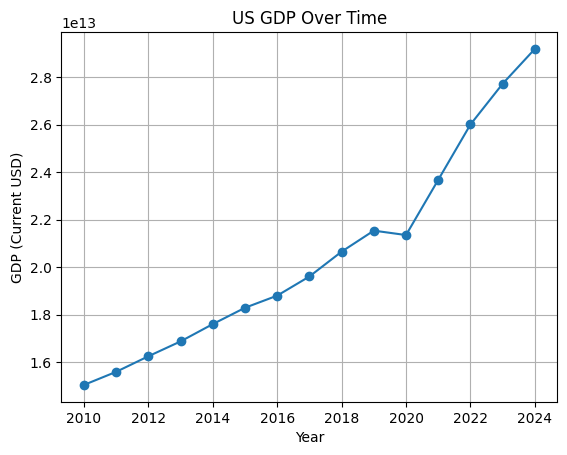

In [ ]:
plt.plot(us_gdp_data.index, us_gdp_data['GDP'], marker='o', linestyle='-')
plt.title('US GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.grid(True)
plt.show()

In [ ]:
def split_data(data, column):
    train_data = data.loc[:'2019', column]
    test_data = data.loc['2020':, column]
    return train_data, test_data

usa_train_data, usa_test_data = split_data(us_gdp_data, 'GDP')
usa_train_data_freq = usa_train_data.asfreq('YS')

#function to evaluate the mape
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Theta Model

Theta Model Performance for USA GDP:
  MAPE: 11.79%
  MAE: 3201612262640.44
  R2: -0.81


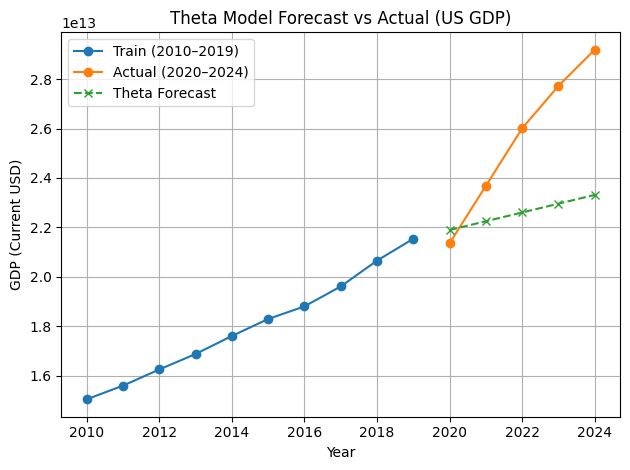

In [ ]:
from statsmodels.tsa.forecasting.theta import ThetaModel

#instantiate and fit the Theta model
theta_model = ThetaModel(usa_train_data_freq).fit()

#make predictions for the test period
theta_predictions = theta_model.forecast(len(usa_test_data))

#align the index of predictions with test data for plotting
theta_predictions.index = usa_test_data.index

#calculate MAPE, MAE, and R2 for Theta model
theta_mape = mean_absolute_percentage_error(usa_test_data, theta_predictions)
theta_mae = mean_absolute_error(usa_test_data, theta_predictions)
theta_r2 = r2_score(usa_test_data, theta_predictions)

#print the calculated metrics
print(f'Theta Model Performance for USA GDP:')
print(f'  MAPE: {theta_mape:.2f}%')
print(f'  MAE: {theta_mae:.2f}')
print(f'  R2: {theta_r2:.2f}')

#plot the data
plt.plot(usa_train_data.index, usa_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(usa_test_data.index, usa_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(theta_predictions.index, theta_predictions, label='Theta Forecast', linestyle='--', marker='x')
plt.title('Theta Model Forecast vs Actual (US GDP)')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

USA Theta Model Future Forecast (2025-2030):
2025-01-01    2.189467e+13
2026-01-01    2.224942e+13
2027-01-01    2.260417e+13
2028-01-01    2.295892e+13
2029-01-01    2.331366e+13
2030-01-01    2.366841e+13
Name: forecast, dtype: float64


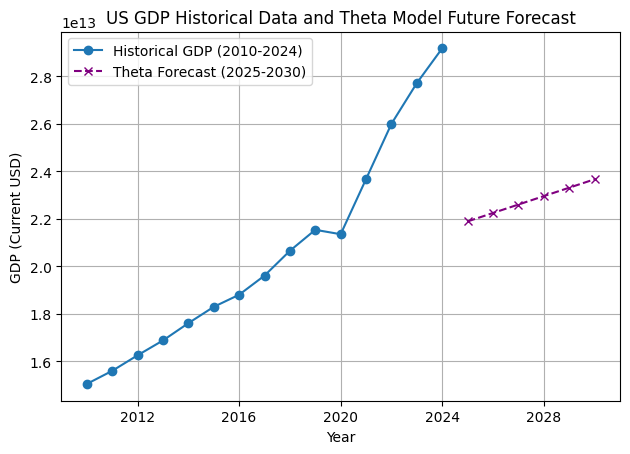

In [ ]:
#define the range of future years for forecasting, from 2025 to 2030.
start_year = 2025
end_year = 2030
num_forecast_steps = end_year - start_year + 1

#Use the previously fitted theta_model to generate forecasts for these future years.
theta_future_forecast = theta_model.forecast(steps=num_forecast_steps)

#create a time series index for these future years and assign the forecasts to it.
forecast_years_index = pd.to_datetime(range(start_year, end_year + 1), format='%Y')
theta_future_forecast.index = forecast_years_index

#print the generated future forecasts.
print("USA Theta Model Future Forecast (2025-2030):")
print(theta_future_forecast)

#plot the historical USA GDP data along with the Theta model's future forecasts on a single chart for visual comparison.
plt.plot(us_gdp_data.index, us_gdp_data['GDP'], label='Historical GDP (2010-2024)', marker='o')
plt.plot(theta_future_forecast.index, theta_future_forecast.values, label='Theta Forecast (2025-2030)', linestyle='--', marker='x', color='purple')
plt.title('US GDP Historical Data and Theta Model Future Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA

In [ ]:
import itertools
import warnings
import traceback

warnings.filterwarnings("ignore")

#function to evaluate the mape
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#function to validate arima
def evaluate_arima(train_data, test_data, order):
    """
    Fit ARIMA model and return MAPE, MAE, R2.
    """
    try:
        model = ARIMA(
            train_data,
            order=order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit()

        #forecast test period
        preds = model_fit.forecast(steps=len(test_data))

        mape = mean_absolute_percentage_error(test_data, preds)
        mae = mean_absolute_error(test_data, preds)
        r2 = r2_score(test_data, preds)

        return mape, mae, r2

    except Exception as e:
        return float('inf'), float('inf'), float('-inf')

In [ ]:
#define the parameters space
p_values = range(0, 6)
d_values = range(0, 5)
q_values = range(0, 6)

best_order = None
best_mape = float('inf')
best_metrics = (float('inf'), float('inf'), float('-inf'))

for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    mape, mae, r2 = evaluate_arima(usa_train_data, usa_test_data, order)
    if mape != float('inf'):
        print(f"ARIMA{order} MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")

    #choose model with lowest MAPE
    if mape < best_mape:
        best_mape = mape
        best_order = order
        best_metrics = (mape, mae, r2)

print("\nBest Model:")
print(f"ARIMA{best_order} MAPE: {best_metrics[0]:.3f} "
      f"MAE: {best_metrics[1]:.3f} R2: {best_metrics[2]:.3f}")

ARIMA(0, 0, 0) MAPE: 28.656 MAE: 7559551000000.000 R2: -7.285
ARIMA(0, 0, 1) MAPE: 27.196 MAE: 7247787951312.672 R2: -7.083
ARIMA(0, 0, 2) MAPE: 25.923 MAE: 6960976005209.384 R2: -6.830
ARIMA(0, 0, 3) MAPE: 261232309907521357858580987904.000 MAE: 59100628310744852107183363256719073345536.000 R2: -1135655452380341683608313975104211782642849437098841210880.000
ARIMA(0, 0, 4) MAPE: 22.870 MAE: 6226409406107.148 R2: -5.938
ARIMA(0, 0, 5) MAPE: 32.947 MAE: 8475964987392.008 R2: -8.597
ARIMA(0, 1, 0) MAPE: 15.116 MAE: 4123922400000.000 R2: -2.090
ARIMA(0, 1, 1) MAPE: 14.232 MAE: 3869452998386.623 R2: -1.676
ARIMA(0, 1, 2) MAPE: 14.241 MAE: 3874340726995.645 R2: -1.693
ARIMA(0, 1, 3) MAPE: 12.278 MAE: 3337896686258.385 R2: -1.022
ARIMA(0, 1, 4) MAPE: 12.529 MAE: 3403981095810.093 R2: -1.098
ARIMA(0, 1, 5) MAPE: 15.065 MAE: 4102134251214.784 R2: -2.019
ARIMA(0, 2, 0) MAPE: 6.836 MAE: 1826910800000.000 R2: 0.439
ARIMA(0, 2, 1) MAPE: 6.638 MAE: 1772042044600.384 R2: 0.473
ARIMA(0, 2, 2) MAPE: 86

MAPE: 2.35%
R2: 0.94
MAE: 553943035623.00


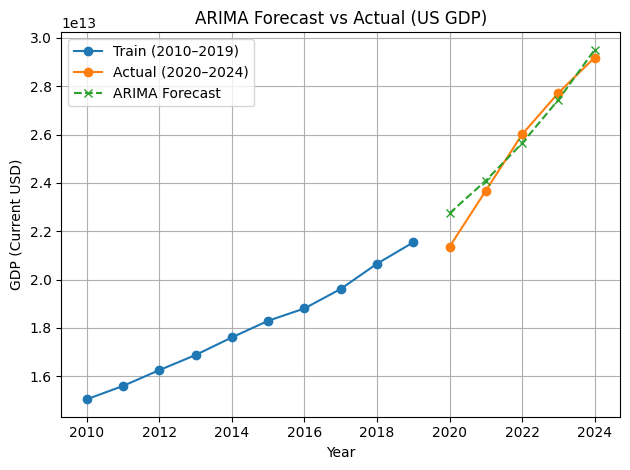

In [ ]:
#retraining the arima with the best parameters
us_arima_model = ARIMA(usa_train_data, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
us_arima_model_fit = us_arima_model.fit()
us_predictions = us_arima_model_fit.forecast(steps=len(usa_test_data))
#evaluate again
us_mape = mean_absolute_percentage_error(usa_test_data, us_predictions)
us_r2 = r2_score(usa_test_data, us_predictions)
usa_mae = mean_absolute_error(usa_test_data, us_predictions)
print(f'MAPE: {us_mape:.2f}%')
print(f'R2: {us_r2:.2f}')
print(f'MAE: {usa_mae:.2f}')
#plot the data
plt.plot(usa_train_data.index, usa_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(usa_test_data.index, usa_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(us_predictions.index, us_predictions, label='ARIMA Forecast', linestyle='--', marker='x')
plt.title("ARIMA Forecast vs Actual (US GDP)")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#create a function to make future forecast
def forecast_gdp(train_data, order, country, start_year=2025, end_year=2030):

    #create forecast index
    forecast_years = pd.period_range(start=str(start_year), end=str(end_year), freq='Y')

    #fit ARIMA model
    model = ARIMA(
        train_data,
        order=order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    model_fit = model.fit()

    #forecast ahead
    forecast = model_fit.forecast(steps=len(forecast_years))
    forecast.index = forecast_years

    #plot
    plt.plot(train_data.index, train_data.values,
             marker='o', label='Historical GDP')
    plt.plot(forecast.index.to_timestamp(), forecast.values,
             linestyle='--', marker='x', label=f'Forecast {start_year}-{end_year}')

    plt.title(f"{country} GDP Forecast using ARIMA")
    plt.xlabel("Year")
    plt.ylabel("GDP (Current USD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return forecast

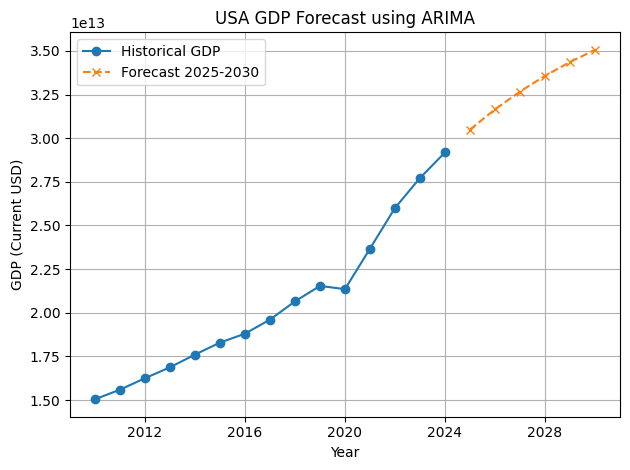

,predicted_mean
2025,3.049466e+13
2026,3.165027e+13
2027,3.266940e+13
2028,3.356838e+13
2029,3.436128e+13
2030,3.506065e+13


In [ ]:
usa_gdp_forecast = forecast_gdp(us_gdp_data, best_order, 'USA')
usa_gdp_forecast

### BSTS

In [ ]:
us_gdp_data_series = us_gdp_data['GDP']
usa_train_data_bsts = us_gdp_data_series.loc[:'2019'].asfreq('YS')
usa_test_data_bsts = us_gdp_data_series.loc['2020':].asfreq('YS')
print("USA Training Data for BSTS (2010-2019):")
print(usa_train_data_bsts.head())
print("\nUSA Testing Data for BSTS (2020-2024):")
print(usa_test_data_bsts.head())

USA Training Data for BSTS (2010-2019):
year
2010-01-01    1.504897e+13
2011-01-01    1.559973e+13
2012-01-01    1.625397e+13
2013-01-01    1.688068e+13
2014-01-01    1.760814e+13
Freq: YS-JAN, Name: GDP, dtype: float64

USA Testing Data for BSTS (2020-2024):
year
2020-01-01    2.135410e+13
2021-01-01    2.368117e+13
2022-01-01    2.600689e+13
2023-01-01    2.772071e+13
2024-01-01    2.918489e+13
Freq: YS-JAN, Name: GDP, dtype: float64


In [ ]:
import itertools
import warnings
from statsmodels.tsa.statespace.structural import UnobservedComponents
warnings.filterwarnings("ignore")
season_periods = [1]
state_filters = ['kalman', 'mcmc']
mcmc_steps = [500, 1000]
def evaluate_bsts_model(train_data, test_data, params):
    """
    Fits a BSTS model with given hyperparameters, makes predictions, and calculates metrics.
    """
    try:
        model = UnobservedComponents(
            train_data,
            level='local level'
        )
        if params['state_filter'] == 'kalman':
            model_fit = model.fit(maxiter=1000, disp=False)
        else:
            model_fit = model.fit(niter=params['steps'], disp=False)
        predictions = model_fit.forecast(steps=len(test_data))
        mape = mean_absolute_percentage_error(test_data, predictions)
        mae = mean_absolute_error(test_data, predictions)
        r2 = r2_score(test_data, predictions)

        return mape, mae, r2

    except Exception as e:
        print(f"Error fitting model with params {params}: {e}")
        return float('inf'), float('inf'), float('-inf')

best_bsts_mape = float('inf')
best_bsts_params = None
best_bsts_metrics = (float('inf'), float('inf'), float('-inf'))

print("Starting BSTS hyperparameter tuning...")
for s_period in season_periods:
    for s_filter in state_filters:
        if s_filter == 'mcmc':
            for steps_val in mcmc_steps:
                params = {
                    'season_periods': s_period,
                    'state_filter': s_filter,
                    'steps': steps_val
                }
                mape, mae, r2 = evaluate_bsts_model(usa_train_data_bsts, usa_test_data_bsts, params)
                if mape != float('inf'):
                    print(f"BSTS(Filter={s_filter}, Steps={steps_val}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
                if mape < best_bsts_mape:
                    best_bsts_mape = mape
                    best_bsts_params = params
                    best_bsts_metrics = (mape, mae, r2)
        else:
            params = {
                'season_periods': s_period,
                'state_filter': s_filter,
                'steps': None
            }
            mape, mae, r2 = evaluate_bsts_model(usa_train_data_bsts, usa_test_data_bsts, params)
            if mape != float('inf'):
                print(f"BSTS(Filter={s_filter}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
            if mape < best_bsts_mape:
                best_bsts_mape = mape
                best_bsts_params = params
                best_bsts_metrics = (mape, mae, r2)

print("\nBSTS Hyperparameter Tuning Complete.")
print("\nBest BSTS Model:")
print(f"Parameters: {best_bsts_params}")
print(f"MAPE: {best_bsts_metrics[0]:.3f} MAE: {best_bsts_metrics[1]:.3f} R2: {best_bsts_metrics[2]:.3f}")

Starting BSTS hyperparameter tuning...
BSTS(Filter=kalman) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097
BSTS(Filter=mcmc, Steps=500) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097
BSTS(Filter=mcmc, Steps=1000) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097

BSTS Hyperparameter Tuning Complete.

Best BSTS Model:
Parameters: {'season_periods': 1, 'state_filter': 'kalman', 'steps': None}
MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097


In [ ]:
bsts_best_model = UnobservedComponents(
    usa_train_data_bsts,
    level="local level"
)

bsts_best_fit = bsts_best_model.fit(
    maxiter=1000,
    disp=False
)
test_forecast = bsts_best_fit.forecast(
    steps=len(usa_test_data_bsts)
)
best_bsts_mape = mean_absolute_percentage_error(usa_test_data_bsts, test_forecast)
best_bsts_mae = mean_absolute_error(usa_test_data_bsts, test_forecast)
best_bsts_r2 = r2_score(usa_test_data_bsts, test_forecast)

print("Best BSTS model evaluation on test set:")
print(f"MAPE: {best_bsts_mape:.3f}")
print(f"MAE:  {best_bsts_mae:.3f}")
print(f"R2:   {best_bsts_r2:.3f}")

Best BSTS model evaluation on test set:
MAPE: 15.129
MAE:  4127773342094.224
R2:   -2.097


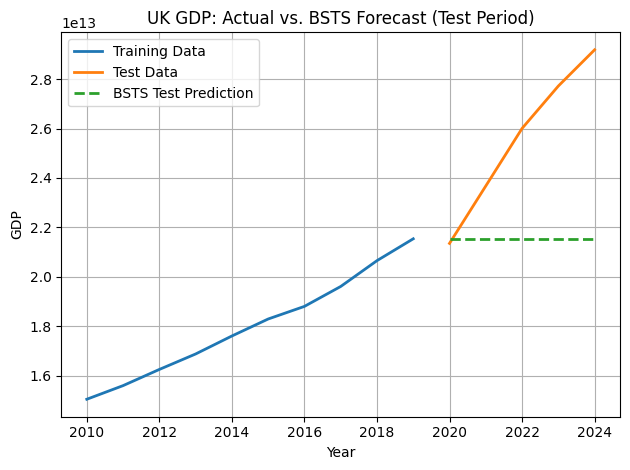

In [ ]:
#plot training data
plt.plot(
    usa_train_data_bsts.index,
    usa_train_data_bsts.values,
    label="Training Data",
    linewidth=2
)
#plot test data
plt.plot(
    usa_test_data_bsts.index,
    usa_test_data_bsts.values,
    label="Test Data",
    linewidth=2
)

#plot BSTS predictions on test set
plt.plot(
    usa_test_data_bsts.index,
    test_forecast.values,
    label="BSTS Test Prediction",
    linestyle="--",
    linewidth=2
)
plt.title("UK GDP: Actual vs. BSTS Forecast (Test Period)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
usa_full_data_bsts = pd.concat(
    [usa_train_data_bsts, usa_test_data_bsts]
)
bsts_final_model = UnobservedComponents(
    usa_full_data_bsts,
    level="local level"
)
bsts_final_fit = bsts_final_model.fit(
    maxiter=1000,
    disp=False
)
last_year = usa_full_data_bsts.index[-1].year
forecast_horizon = 2030 - last_year
forecast_results = bsts_final_fit.get_forecast(
    steps=forecast_horizon
)

forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

In [ ]:
forecast_years = pd.date_range(
    start=usa_full_data_bsts.index[-1] + pd.DateOffset(years=1),
    periods=forecast_horizon,
    freq="YS"
)
forecast_df = pd.DataFrame({
    "Forecast_GDP": forecast_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
}, index=forecast_years)

forecast_df


,Forecast_GDP,Lower_CI,Upper_CI
2025-01-01,2.910224e+13,2.056830e+13,3.763618e+13
2026-01-01,2.910224e+13,1.734844e+13,4.085604e+13
2027-01-01,2.910224e+13,1.483776e+13,4.336672e+13
2028-01-01,2.910224e+13,1.270715e+13,4.549733e+13
2029-01-01,2.910224e+13,1.082322e+13,4.738126e+13
2030-01-01,2.910224e+13,9.116089e+12,4.908839e+13


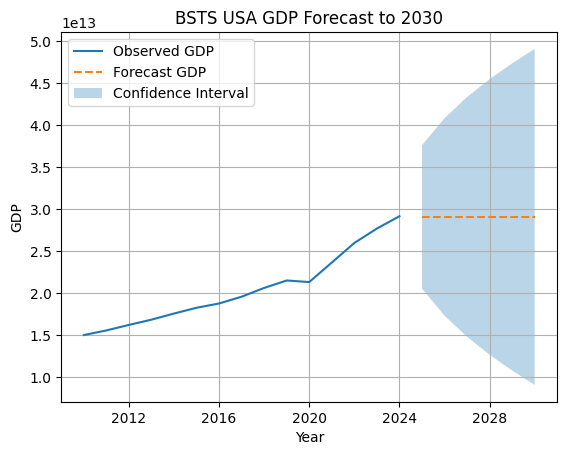

In [ ]:
plt.plot(usa_full_data_bsts, label="Observed GDP")
plt.plot(forecast_df["Forecast_GDP"], label="Forecast GDP", linestyle="--")
plt.fill_between(
    forecast_df.index,
    forecast_df["Lower_CI"],
    forecast_df["Upper_CI"],
    alpha=0.3,
    label="Confidence Interval"
)
plt.legend()
plt.title("BSTS USA GDP Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()


In [ ]:
us_metrics_data = {
    'Model': ['Theta', 'ARIMA', 'BSTS'],
    'MAPE': [theta_mape, us_mape, best_bsts_mape],
    'MAE': [theta_mae, usa_mae, best_bsts_mae],
    'R2': [theta_r2, us_r2, best_bsts_r2]
}

us_comparison_df = pd.DataFrame(us_metrics_data)
us_comparison_df

,Model,MAPE,MAE,R2
0,Theta,11.791283,3.201612e+12,-0.811843
1,ARIMA,2.353344,5.539430e+11,0.938505
2,BSTS,15.129220,4.127773e+12,-2.097097


## China

In [ ]:
china_gdp_data = cleaned_df[cleaned_df['country_name'] == 'China'][['year', 'GDP (Current USD)']].copy()
china_gdp_data['year'] = pd.to_datetime(china_gdp_data['year'], format='%Y')
china_gdp_data = china_gdp_data.set_index('year').sort_index()
china_gdp_data.rename(columns={'GDP (Current USD)': 'GDP'}, inplace=True)
china_gdp_data

,GDP
year,
2010-01-01,6.087192e+12
2011-01-01,7.551546e+12
2012-01-01,8.532185e+12
2013-01-01,9.570471e+12
2014-01-01,1.047562e+13
2015-01-01,1.106157e+13
2016-01-01,1.123331e+13
2017-01-01,1.231049e+13
2018-01-01,1.389491e+13


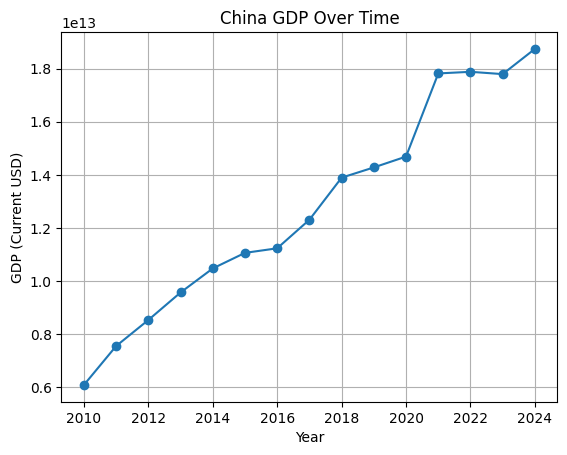

In [ ]:
plt.plot(china_gdp_data.index, china_gdp_data['GDP'], marker='o', linestyle='-')
plt.title('China GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.grid(True)
plt.show()

In [ ]:
china_train_data, china_test_data = split_data(china_gdp_data, 'GDP')

### Theta Model

Theta Model Performance for China GDP:
  MAPE: 10.08%
  MAE: 1819081741525.57
  R2: -1.16


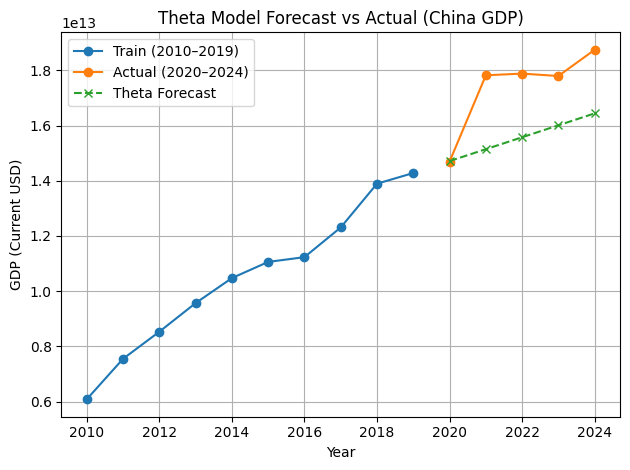

In [ ]:
china_train_data_freq = china_train_data.asfreq('YS')

#instantiate and fit the Theta model
theta_model = ThetaModel(china_train_data_freq).fit()

#make predictions for the test period
theta_predictions = theta_model.forecast(len(china_test_data))

#align the index of predictions with test data for plotting
theta_predictions.index = china_test_data.index

#calculate MAPE, MAE, and R2 for Theta model
theta_mape = mean_absolute_percentage_error(china_test_data, theta_predictions)
theta_mae = mean_absolute_error(china_test_data, theta_predictions)
theta_r2 = r2_score(china_test_data, theta_predictions)

#print the calculated metrics
print(f'Theta Model Performance for China GDP:')
print(f'  MAPE: {theta_mape:.2f}%')
print(f'  MAE: {theta_mae:.2f}')
print(f'  R2: {theta_r2:.2f}')

#plot the data
plt.plot(china_train_data.index, china_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(china_test_data.index, china_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(theta_predictions.index, theta_predictions, label='Theta Forecast', linestyle='--', marker='x')
plt.title('Theta Model Forecast vs Actual (China GDP)')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

China Theta Model Future Forecast (2025-2030):
2025-01-01    1.471211e+13
2026-01-01    1.514424e+13
2027-01-01    1.557638e+13
2028-01-01    1.600851e+13
2029-01-01    1.644065e+13
2030-01-01    1.687278e+13
Name: forecast, dtype: float64


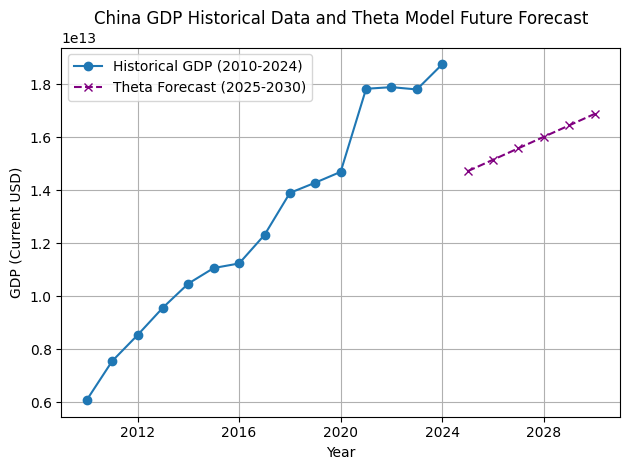

In [ ]:
#Use the previously fitted theta_model to generate forecasts for these future years.
theta_future_forecast = theta_model.forecast(steps=num_forecast_steps)

#create a time series index for these future years and assign the forecasts to it.e
forecast_years_index = pd.to_datetime(range(start_year, end_year + 1), format='%Y')
theta_future_forecast.index = forecast_years_index

#print the generated future forecasts.
print("China Theta Model Future Forecast (2025-2030):")
print(theta_future_forecast)

#plot the historical USA GDP data along with the Theta model's future forecasts on a single chart for visual comparison.
plt.plot(china_gdp_data.index, china_gdp_data['GDP'], label='Historical GDP (2010-2024)', marker='o')
plt.plot(theta_future_forecast.index, theta_future_forecast.values, label='Theta Forecast (2025-2030)', linestyle='--', marker='x', color='purple')
plt.title('China GDP Historical Data and Theta Model Future Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA

In [ ]:
best_order = None
best_mape = float('inf')
best_metrics = (float('inf'), float('inf'), float('-inf'))

for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    mape, mae, r2 = evaluate_arima(china_train_data, china_test_data, order)
    if mape != float('inf'):
        print(f"ARIMA{order} MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
    if mape < best_mape:
        best_mape = mape
        best_order = order
        best_metrics = (mape, mae, r2)

print("\nBest Model:")
print(f"ARIMA{best_order} MAPE: {best_metrics[0]:.3f} "
      f"MAE: {best_metrics[1]:.3f} R2: {best_metrics[2]:.3f}")

ARIMA(0, 0, 0) MAPE: 39.171 MAE: 6885987219643.109 R2: -24.377
ARIMA(0, 0, 1) MAPE: 37.199 MAE: 6596368839200.164 R2: -23.345
ARIMA(0, 0, 2) MAPE: 35.790 MAE: 6370368887278.526 R2: -22.267
ARIMA(0, 0, 3) MAPE: 27991419825158669083656992359740265064582503162879058480894512124358333682780655428405779852419142832266154290268664694224014142223679488.000 MAE: 4462790443600746199803949217993679261051128715046276277180936415281423951994797796994335902827933410952186680290574167551362851072869257662708056064.000 R2: -20857071840571947392609672284491664635572055317112855738250195974465010070756431459945148462782505023234191230799995410725591819574620401726033222157126971142689268926370847706447792277074651919031461513373953735249895513865631034870865524770660912231949344023755416928256.000
ARIMA(0, 0, 4) MAPE: 29.319 MAE: 5295703291351.814 R2: -17.335
ARIMA(0, 0, 5) MAPE: 34.313 MAE: 6185094541182.063 R2: -23.224
ARIMA(0, 1, 0) MAPE: 17.271 MAE: 3105746006876.241 R2: -4.959
ARIMA(0, 1, 1) MAPE:

MAPE: 2.97%
R2: 0.67
MAE: 529811573529.00


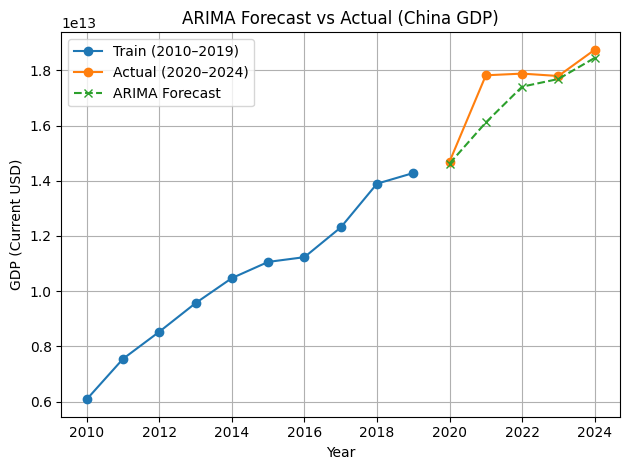

In [ ]:
china_arima_model = ARIMA(china_train_data, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
china_arima_model_fit = china_arima_model.fit()
china_predictions = china_arima_model_fit.forecast(steps=len(china_test_data))
china_mape = mean_absolute_percentage_error(china_test_data, china_predictions)
china_r2 = r2_score(china_test_data, china_predictions)
china_mae = mean_absolute_error(china_test_data, china_predictions)
print(f'MAPE: {china_mape:.2f}%')
print(f'R2: {china_r2:.2f}')
print(f'MAE: {china_mae:.2f}')
plt.plot(china_train_data.index, china_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(china_test_data.index, china_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(china_predictions.index, china_predictions, label='ARIMA Forecast', linestyle='--', marker='x')
plt.title("ARIMA Forecast vs Actual (China GDP)")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

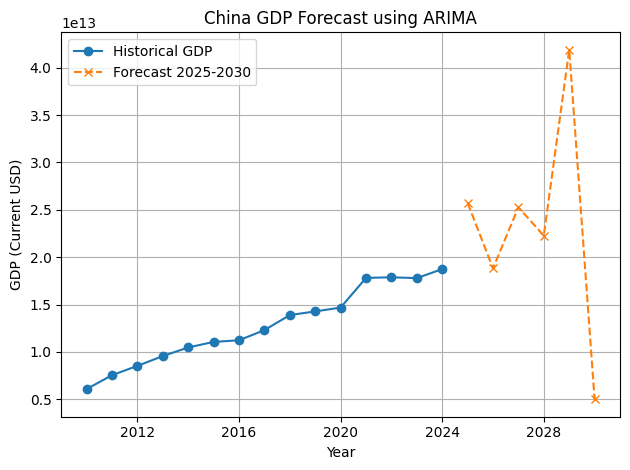

,predicted_mean
2025,2.571828e+13
2026,1.882847e+13
2027,2.527891e+13
2028,2.227416e+13
2029,4.189587e+13
2030,5.008037e+12


In [ ]:
china_gdp_forecast = forecast_gdp(china_gdp_data, best_order, 'China')
china_gdp_forecast

### BSTS

In [ ]:
china_gdp_data_series = china_gdp_data['GDP']
china_train_data_bsts = china_gdp_data_series.loc[:'2019'].asfreq('YS')
china_test_data_bsts = china_gdp_data_series.loc['2020':].asfreq('YS')
print("China Training Data for BSTS (2010-2019):")
print(china_train_data_bsts.head())
print("\nChina Testing Data for BSTS (2020-2024):")
print(china_test_data_bsts.head())

China Training Data for BSTS (2010-2019):
year
2010-01-01    6.087192e+12
2011-01-01    7.551546e+12
2012-01-01    8.532185e+12
2013-01-01    9.570471e+12
2014-01-01    1.047562e+13
Freq: YS-JAN, Name: GDP, dtype: float64

China Testing Data for BSTS (2020-2024):
year
2020-01-01    1.468774e+13
2021-01-01    1.782046e+13
2022-01-01    1.788178e+13
2023-01-01    1.779478e+13
2024-01-01    1.874380e+13
Freq: YS-JAN, Name: GDP, dtype: float64


In [ ]:
best_bsts_mape = float('inf')
best_bsts_params = None
best_bsts_metrics = (float('inf'), float('inf'), float('-inf'))

print("Starting BSTS hyperparameter tuning...")
for s_period in season_periods:
    for s_filter in state_filters:
        if s_filter == 'mcmc':
            for steps_val in mcmc_steps:
                params = {
                    'season_periods': s_period,
                    'state_filter': s_filter,
                    'steps': steps_val
                }
                mape, mae, r2 = evaluate_bsts_model(china_train_data_bsts, china_test_data_bsts, params)
                if mape != float('inf'):
                    print(f"BSTS(Filter={s_filter}, Steps={steps_val}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
                if mape < best_bsts_mape:
                    best_bsts_mape = mape
                    best_bsts_params = params
                    best_bsts_metrics = (mape, mae, r2)
        else:
            params = {
                'season_periods': s_period,
                'state_filter': s_filter,
                'steps': None
            }
            mape, mae, r2 = evaluate_bsts_model(china_train_data_bsts, china_test_data_bsts, params)
            if mape != float('inf'):
                print(f"BSTS(Filter={s_filter}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
            if mape < best_bsts_mape:
                best_bsts_mape = mape
                best_bsts_params = params
                best_bsts_metrics = (mape, mae, r2)

print("\nBSTS Hyperparameter Tuning Complete.")
print("\nBest BSTS Model:")
print(f"Parameters: {best_bsts_params}")
print(f"MAPE: {best_bsts_metrics[0]:.3f} MAE: {best_bsts_metrics[1]:.3f} R2: {best_bsts_metrics[2]:.3f}")

Starting BSTS hyperparameter tuning...
BSTS(Filter=kalman) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097
BSTS(Filter=mcmc, Steps=500) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097
BSTS(Filter=mcmc, Steps=1000) MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097

BSTS Hyperparameter Tuning Complete.

Best BSTS Model:
Parameters: {'season_periods': 1, 'state_filter': 'kalman', 'steps': None}
MAPE: 15.129 MAE: 4127773342094.224 R2: -2.097


In [ ]:
bsts_best_model = UnobservedComponents(
    china_train_data_bsts,
    level="local level"
)

bsts_best_fit = bsts_best_model.fit(
    maxiter=1000,
    disp=False
)
test_forecast = bsts_best_fit.forecast(
    steps=len(china_test_data_bsts)
)
best_bsts_mape = mean_absolute_percentage_error(china_test_data_bsts, test_forecast)
best_bsts_mae = mean_absolute_error(china_test_data_bsts, test_forecast)
best_bsts_r2 = r2_score(china_test_data_bsts, test_forecast)

print("Best BSTS model evaluation on China test set:")
print(f"MAPE: {best_bsts_mape:.3f}")
print(f"MAE:  {best_bsts_mae:.3f}")
print(f"R2:   {best_bsts_r2:.3f}")

Best BSTS model evaluation on China test set:
MAPE: 17.316
MAE:  3113650413222.750
R2:   -4.984


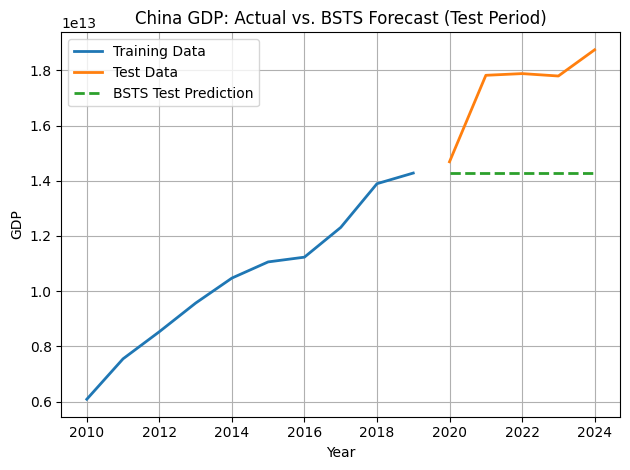

In [ ]:
#plot training data
plt.plot(
    china_train_data_bsts.index,
    china_train_data_bsts.values,
    label="Training Data",
    linewidth=2
)
#plot test data
plt.plot(
    china_test_data_bsts.index,
    china_test_data_bsts.values,
    label="Test Data",
    linewidth=2
)

#plot BSTS predictions on test set
plt.plot(
    china_test_data_bsts.index,
    test_forecast.values,
    label="BSTS Test Prediction",
    linestyle="--",
    linewidth=2
)
plt.title("China GDP: Actual vs. BSTS Forecast (Test Period)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
china_full_data_bsts = pd.concat(
    [china_train_data_bsts, china_test_data_bsts]
)
bsts_final_model = UnobservedComponents(
    china_full_data_bsts,
    level="local level"
)
bsts_final_fit = bsts_final_model.fit(
    maxiter=1000,
    disp=False
)
last_year = china_full_data_bsts.index[-1].year
forecast_horizon = 2030 - last_year
forecast_results = bsts_final_fit.get_forecast(
    steps=forecast_horizon
)

forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

In [ ]:
forecast_years = pd.date_range(
    start=china_full_data_bsts.index[-1] + pd.DateOffset(years=1),
    periods=forecast_horizon,
    freq="YS"
)
forecast_df = pd.DataFrame({
    "Forecast_GDP": forecast_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
}, index=forecast_years)

forecast_df

,Forecast_GDP,Lower_CI,Upper_CI
2025-01-01,1.872507e+13,1.096436e+13,2.648578e+13
2026-01-01,1.872507e+13,7.857737e+12,2.959240e+13
2027-01-01,1.872507e+13,5.459732e+12,3.199041e+13
2028-01-01,1.872507e+13,3.433260e+12,3.401688e+13
2029-01-01,1.872507e+13,1.645558e+12,3.580458e+13
2030-01-01,1.872507e+13,2.801144e+10,3.742213e+13


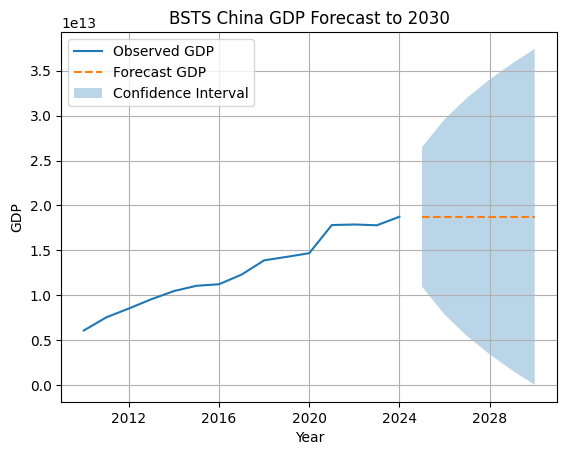

In [ ]:
plt.plot(china_full_data_bsts, label="Observed GDP")
plt.plot(forecast_df["Forecast_GDP"], label="Forecast GDP", linestyle="--")
plt.fill_between(
    forecast_df.index,
    forecast_df["Lower_CI"],
    forecast_df["Upper_CI"],
    alpha=0.3,
    label="Confidence Interval"
)
plt.legend()
plt.title("BSTS China GDP Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()

In [ ]:
china_metrics_data = {
    'Model': ['Theta', 'ARIMA', 'BSTS'],
    'MAPE': [theta_mape, china_mape, best_bsts_mape],
    'MAE': [theta_mae,  china_mae, best_bsts_mae],
    'R2': [theta_r2, china_r2, best_bsts_r2]
}

china_comparison_df = pd.DataFrame(china_metrics_data)
china_comparison_df

,Model,MAPE,MAE,R2
0,Theta,10.080347,1.819082e+12,-1.156402
1,ARIMA,2.970839,5.298116e+11,0.666631
2,BSTS,17.316424,3.113650e+12,-4.984035


## Japan

In [ ]:
japan_gdp_data = cleaned_df[cleaned_df['country_name'] == 'Japan'][['year', 'GDP (Current USD)']].copy()
japan_gdp_data['year'] = pd.to_datetime(japan_gdp_data['year'], format='%Y')
japan_gdp_data = japan_gdp_data.set_index('year').sort_index()
japan_gdp_data.rename(columns={'GDP (Current USD)': 'GDP'}, inplace=True)
japan_gdp_data

,GDP
year,
2010-01-01,5.759072e+12
2011-01-01,6.233147e+12
2012-01-01,6.272363e+12
2013-01-01,5.212328e+12
2014-01-01,4.896994e+12
2015-01-01,4.444931e+12
2016-01-01,5.003678e+12
2017-01-01,4.930837e+12
2018-01-01,5.040881e+12


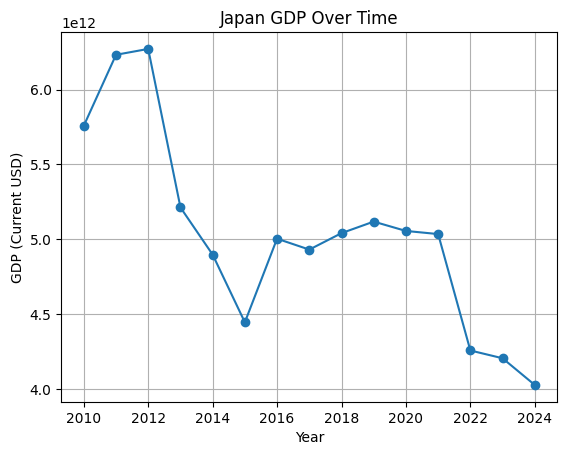

In [ ]:
plt.plot(japan_gdp_data.index, japan_gdp_data['GDP'], marker='o', linestyle='-')
plt.title('Japan GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.grid(True)
plt.show()

In [ ]:
japan_train_data, japan_test_data = split_data(japan_gdp_data, 'GDP')

### Theta

Theta Model Performance for Japan GDP:
  MAPE: 10.18%
  MAE: 424749925890.75
  R2: -0.49


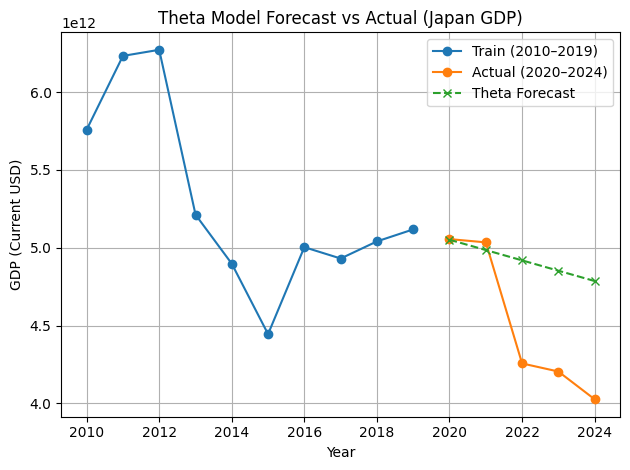

In [ ]:
japan_train_data_freq = japan_train_data.asfreq('YS')
theta_model = ThetaModel(japan_train_data_freq).fit()
theta_predictions = theta_model.forecast(len(japan_test_data))
theta_predictions.index = japan_test_data.index
theta_mape = mean_absolute_percentage_error(japan_test_data, theta_predictions)
theta_mae = mean_absolute_error(japan_test_data, theta_predictions)
theta_r2 = r2_score(japan_test_data, theta_predictions)

print(f'Theta Model Performance for Japan GDP:')
print(f'  MAPE: {theta_mape:.2f}%')
print(f'  MAE: {theta_mae:.2f}')
print(f'  R2: {theta_r2:.2f}')
plt.plot(japan_train_data.index, japan_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(japan_test_data.index, japan_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(theta_predictions.index, theta_predictions, label='Theta Forecast', linestyle='--', marker='x')
plt.title('Theta Model Forecast vs Actual (Japan GDP)')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Japan Theta Model Future Forecast (2025–2030):
2025-01-01    5.051597e+12
2026-01-01    4.985229e+12
2027-01-01    4.918862e+12
2028-01-01    4.852495e+12
2029-01-01    4.786127e+12
2030-01-01    4.719760e+12
Name: forecast, dtype: float64


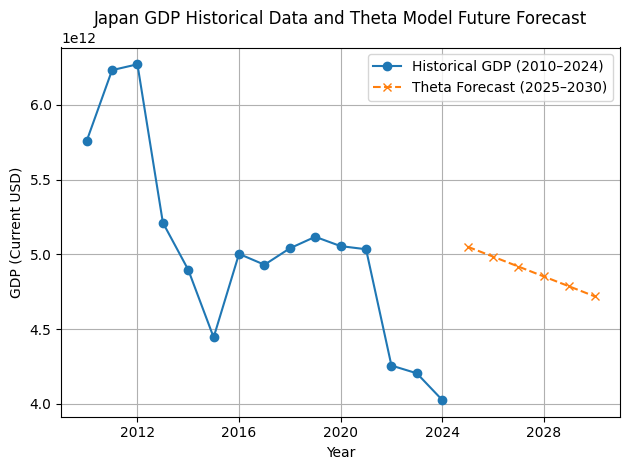

In [ ]:
theta_future_forecast = theta_model.forecast(steps=num_forecast_steps)

forecast_years_index = pd.to_datetime(range(start_year, end_year + 1), format='%Y')
theta_future_forecast.index = forecast_years_index

print("Japan Theta Model Future Forecast (2025–2030):")
print(theta_future_forecast)

plt.plot(japan_gdp_data.index, japan_gdp_data['GDP'], label='Historical GDP (2010–2024)', marker='o')
plt.plot(theta_future_forecast.index, theta_future_forecast.values,
         label='Theta Forecast (2025–2030)', linestyle='--', marker='x')
plt.title('Japan GDP Historical Data and Theta Model Future Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ARIMA

In [ ]:
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    mape, mae, r2 = evaluate_arima(japan_train_data, japan_test_data, order)
    if mape != float('inf'):
        print(f"ARIMA{order} MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
        if mape < best_mape:
            best_mape = mape
            best_order = order
            best_metrics = (mape, mae, r2)
print("Best Model:")
print(f"ARIMA{best_order} MAPE: {best_metrics[0]:.3f} "
      f"MAE: {best_metrics[1]:.3f} R2: {best_metrics[2]:.3f}")

ARIMA(0, 0, 0) MAPE: 18.267 MAE: 775757644020.281 R2: -3.120
ARIMA(0, 0, 1) MAPE: 17.788 MAE: 751533396566.479 R2: -3.076
ARIMA(0, 0, 2) MAPE: 17.623 MAE: 743172083007.620 R2: -3.068
ARIMA(0, 0, 3) MAPE: 1275198970404691880457728425984.000 MAE: 64393744655106820996335288568717730906112.000 R2: -64160570179007006604881679118171161743253295609721443581952.000
ARIMA(0, 0, 4) MAPE: 17.635 MAE: 744961018592.357 R2: -3.006
ARIMA(0, 0, 5) MAPE: 18.490 MAE: 787003770795.405 R2: -3.151
ARIMA(0, 1, 0) MAPE: 14.395 MAE: 602529000538.774 R2: -1.882
ARIMA(0, 1, 1) MAPE: 14.522 MAE: 608190063302.419 R2: -1.918
ARIMA(0, 1, 2) MAPE: 18.505 MAE: 783925733618.499 R2: -3.317
ARIMA(0, 1, 3) MAPE: 15.472 MAE: 650895419514.798 R2: -2.187
ARIMA(0, 1, 4) MAPE: 14.396 MAE: 602571592642.562 R2: -1.883
ARIMA(0, 1, 5) MAPE: 14.100 MAE: 590808475627.278 R2: -1.741
ARIMA(0, 2, 0) MAPE: 19.782 MAE: 833867741613.722 R2: -4.129
ARIMA(0, 2, 1) MAPE: 19.586 MAE: 825434405205.918 R2: -4.035
ARIMA(0, 2, 2) MAPE: 118871211

MAPE: 13.13%
R2: -1.47
MAE: 547767352988.26


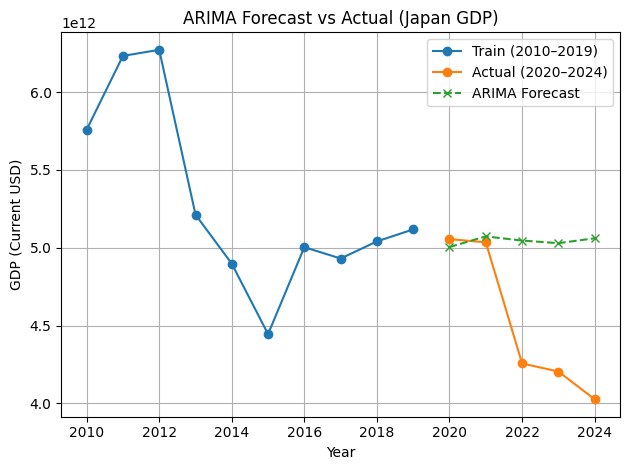

In [ ]:
japan_arima_model = ARIMA(japan_train_data, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
japan_arima_model_fit = japan_arima_model.fit()
japan_predictions = japan_arima_model_fit.forecast(steps=len(japan_test_data))
japan_mape = mean_absolute_percentage_error(japan_test_data, japan_predictions)
japan_r2 = r2_score(japan_test_data, japan_predictions)
japan_mae = mean_absolute_error(japan_test_data, japan_predictions)
print(f'MAPE: {japan_mape:.2f}%')
print(f'R2: {japan_r2:.2f}')
print(f'MAE: {japan_mae:.2f}')
plt.plot(japan_train_data.index, japan_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(japan_test_data.index, japan_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(japan_predictions.index, japan_predictions, label='ARIMA Forecast', linestyle='--', marker='x')
plt.title("ARIMA Forecast vs Actual (Japan GDP)")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

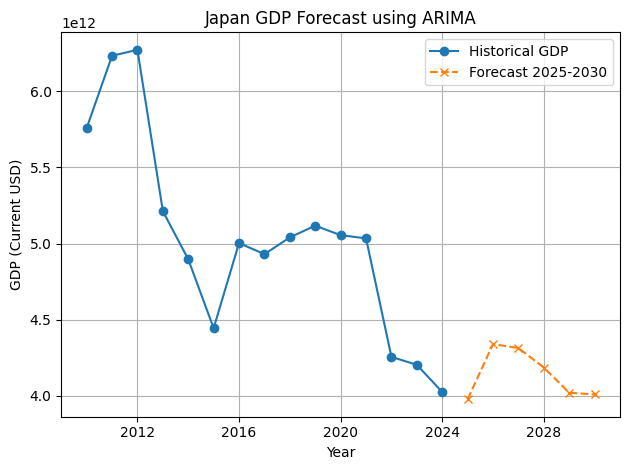

,predicted_mean
2025,3.978454e+12
2026,4.340595e+12
2027,4.314809e+12
2028,4.186590e+12
2029,4.021416e+12
2030,4.009760e+12


In [ ]:
japan_gdp_forecast = forecast_gdp(japan_gdp_data, best_order, 'Japan')
japan_gdp_forecast

### BSTS

In [ ]:
japan_gdp_data_series = japan_gdp_data['GDP']
japan_train_data_bsts = japan_gdp_data_series.loc[:'2019'].asfreq('YS')
japan_test_data_bsts = japan_gdp_data_series.loc['2020':].asfreq('YS')

print("Japan Training Data for BSTS (2010-2019):")
print(japan_train_data_bsts.head())
print("\nJapan Testing Data for BSTS (2020-2024):")
print(japan_test_data_bsts.head())


Japan Training Data for BSTS (2010-2019):
year
2010-01-01    5.759072e+12
2011-01-01    6.233147e+12
2012-01-01    6.272363e+12
2013-01-01    5.212328e+12
2014-01-01    4.896994e+12
Freq: YS-JAN, Name: GDP, dtype: float64

Japan Testing Data for BSTS (2020-2024):
year
2020-01-01    5.055587e+12
2021-01-01    5.034621e+12
2022-01-01    4.256411e+12
2023-01-01    4.204495e+12
2024-01-01    4.026211e+12
Freq: YS-JAN, Name: GDP, dtype: float64


In [ ]:
best_bsts_mape = float('inf')
best_bsts_params = None
best_bsts_metrics = (float('inf'), float('inf'), float('-inf'))

print("Starting BSTS hyperparameter tuning...")

for s_period in season_periods:
    for s_filter in state_filters:
        if s_filter == 'mcmc':
            for steps_val in mcmc_steps:
                params = {
                    'season_periods': s_period,
                    'state_filter': s_filter,
                    'steps': steps_val
                }
                mape, mae, r2 = evaluate_bsts_model(japan_train_data_bsts, japan_test_data_bsts, params)
                if mape != float('inf'):
                    print(f"BSTS(Filter={s_filter}, Steps={steps_val}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
                if mape < best_bsts_mape:
                    best_bsts_mape = mape
                    best_bsts_params = params
                    best_bsts_metrics = (mape, mae, r2)
        else:
            params = {
                'season_periods': s_period,
                'state_filter': s_filter,
                'steps': None
            }
            mape, mae, r2 = evaluate_bsts_model(japan_train_data_bsts, japan_test_data_bsts, params)
            if mape != float('inf'):
                print(f"BSTS(Filter={s_filter}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
            if mape < best_bsts_mape:
                best_bsts_mape = mape
                best_bsts_params = params
                best_bsts_metrics = (mape, mae, r2)

print("\nBSTS Hyperparameter Tuning Complete.")
print("\nBest BSTS Model:")
print(f"Parameters: {best_bsts_params}")
print(f"MAPE: {best_bsts_metrics[0]:.3f} MAE: {best_bsts_metrics[1]:.3f} R2: {best_bsts_metrics[2]:.3f}")


Starting BSTS hyperparameter tuning...
BSTS(Filter=kalman) MAPE: 13.132 MAE: 545992774681.104 R2: -1.546
BSTS(Filter=mcmc, Steps=500) MAPE: 13.132 MAE: 545992774681.104 R2: -1.546
BSTS(Filter=mcmc, Steps=1000) MAPE: 13.132 MAE: 545992774681.104 R2: -1.546

BSTS Hyperparameter Tuning Complete.

Best BSTS Model:
Parameters: {'season_periods': 1, 'state_filter': 'kalman', 'steps': None}
MAPE: 13.132 MAE: 545992774681.104 R2: -1.546


Best BSTS model evaluation on Japan test set:
MAPE: 13.132
MAE:  545992774681.104
R2:   -1.546


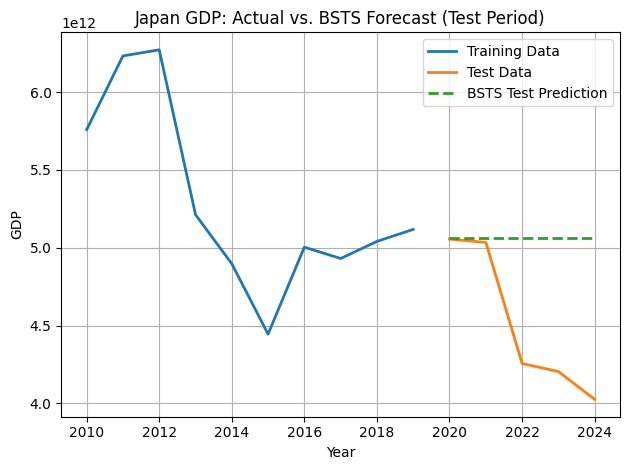

In [ ]:
bsts_best_model = UnobservedComponents(
    japan_train_data_bsts,
    level="local level"
)

bsts_best_fit = bsts_best_model.fit(
    maxiter=1000,
    disp=False
)
test_forecast = bsts_best_fit.forecast(
    steps=len(japan_test_data_bsts)
)

best_bsts_mape = mean_absolute_percentage_error(japan_test_data_bsts, test_forecast)
best_bsts_mae = mean_absolute_error(japan_test_data_bsts, test_forecast)
best_bsts_r2 = r2_score(japan_test_data_bsts, test_forecast)

print("Best BSTS model evaluation on Japan test set:")
print(f"MAPE: {best_bsts_mape:.3f}")
print(f"MAE:  {best_bsts_mae:.3f}")
print(f"R2:   {best_bsts_r2:.3f}")

plt.plot(japan_train_data_bsts.index, japan_train_data_bsts.values, label="Training Data", linewidth=2)
plt.plot(japan_test_data_bsts.index, japan_test_data_bsts.values, label="Test Data", linewidth=2)
plt.plot(japan_test_data_bsts.index, test_forecast.values, label="BSTS Test Prediction", linestyle="--", linewidth=2)

plt.title("Japan GDP: Actual vs. BSTS Forecast (Test Period)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
japan_full_data_bsts = pd.concat(
    [japan_train_data_bsts, japan_test_data_bsts]
)

bsts_final_model = UnobservedComponents(
    japan_full_data_bsts,
    level="local level"
)

bsts_final_fit = bsts_final_model.fit(
    maxiter=1000,
    disp=False
)
last_year = japan_full_data_bsts.index[-1].year
forecast_horizon = 2030 - last_year

forecast_results = bsts_final_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

forecast_years = pd.date_range(
    start=japan_full_data_bsts.index[-1] + pd.DateOffset(years=1),
    periods=forecast_horizon,
    freq="YS"
)

forecast_df = pd.DataFrame({
    "Forecast_GDP": forecast_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
}, index=forecast_years)

forecast_df


,Forecast_GDP,Lower_CI,Upper_CI
2025-01-01,4.101104e+12,2.687250e+12,5.514958e+12
2026-01-01,4.101104e+12,2.366395e+12,5.835813e+12
2027-01-01,4.101104e+12,2.096249e+12,6.105960e+12
2028-01-01,4.101104e+12,1.858410e+12,6.343798e+12
2029-01-01,4.101104e+12,1.643482e+12,6.558726e+12
2030-01-01,4.101104e+12,1.445895e+12,6.756314e+12


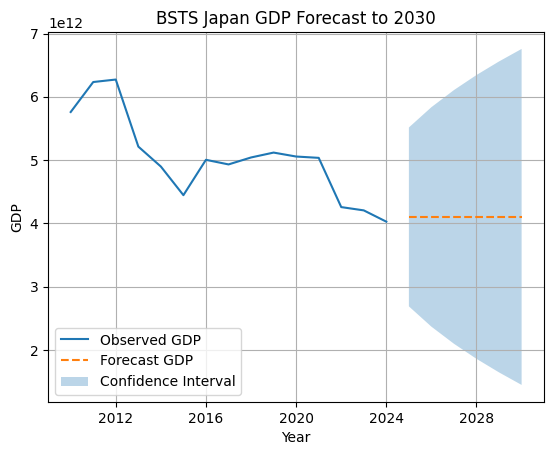

In [ ]:
plt.plot(japan_full_data_bsts, label="Observed GDP")
plt.plot(forecast_df["Forecast_GDP"], label="Forecast GDP", linestyle="--")
plt.fill_between(
    forecast_df.index,
    forecast_df["Lower_CI"],
    forecast_df["Upper_CI"],
    alpha=0.3,
    label="Confidence Interval"
)

plt.legend()
plt.title("BSTS Japan GDP Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()


In [ ]:
japan_metrics_data = {
    'Model': ['Theta', 'ARIMA', 'BSTS'],
    'MAPE': [theta_mape, japan_mape, best_bsts_mape],
    'MAE': [theta_mae,  japan_mae, best_bsts_mae],
    'R2': [theta_r2, japan_r2, best_bsts_r2]
}

japan_comparison_df = pd.DataFrame(japan_metrics_data)
japan_comparison_df


,Model,MAPE,MAE,R2
0,Theta,10.181978,4.247499e+11,-0.491726
1,ARIMA,13.129283,5.477674e+11,1.466687
2,BSTS,13.131532,5.459928e+11,-1.545505


## Germany

In [ ]:
germany_gdp_data = cleaned_df[cleaned_df['country_name'] == 'Germany'][['year', 'GDP (Current USD)']].copy()
germany_gdp_data['year'] = pd.to_datetime(germany_gdp_data['year'], format='%Y')
germany_gdp_data = germany_gdp_data.set_index('year').sort_index()
germany_gdp_data.rename(columns={'GDP (Current USD)': 'GDP'}, inplace=True)
germany_gdp_data

,GDP
year,
2010-01-01,3.468154e+12
2011-01-01,3.824829e+12
2012-01-01,3.597897e+12
2013-01-01,3.808086e+12
2014-01-01,3.965801e+12
2015-01-01,3.423568e+12
2016-01-01,3.537784e+12
2017-01-01,3.763092e+12
2018-01-01,4.052008e+12


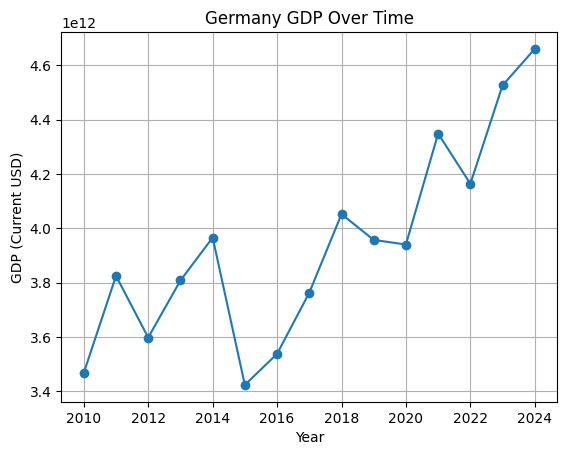

In [ ]:
plt.plot(germany_gdp_data.index, germany_gdp_data['GDP'], marker='o', linestyle='-')
plt.title('Germany GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.grid(True)
plt.show()

In [ ]:
germany_train_data, germany_test_data = split_data(germany_gdp_data, 'GDP')

### Theta

Theta Model Performance for Germany GDP:
  MAPE: 8.29%
  MAE: 371774668851.75
  R2: -1.96


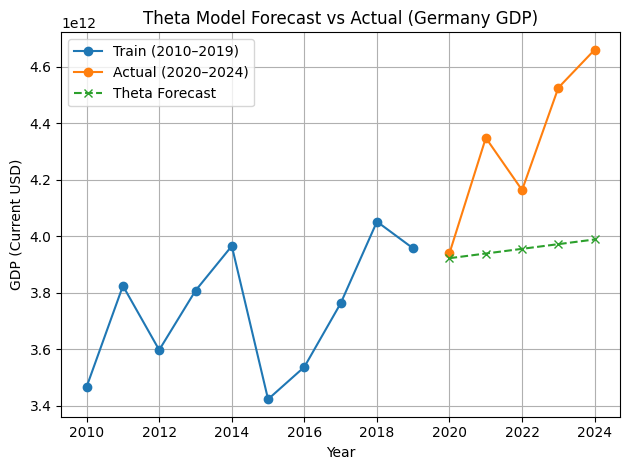

In [ ]:
germany_train_data_freq = germany_train_data.asfreq('YS')

theta_model = ThetaModel(germany_train_data_freq).fit()

theta_predictions = theta_model.forecast(len(germany_test_data))
theta_predictions.index = germany_test_data.index

theta_mape = mean_absolute_percentage_error(germany_test_data, theta_predictions)
theta_mae = mean_absolute_error(germany_test_data, theta_predictions)
theta_r2 = r2_score(germany_test_data, theta_predictions)

print(f'Theta Model Performance for Germany GDP:')
print(f'  MAPE: {theta_mape:.2f}%')
print(f'  MAE: {theta_mae:.2f}')
print(f'  R2: {theta_r2:.2f}')

plt.plot(germany_train_data.index, germany_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(germany_test_data.index, germany_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(theta_predictions.index, theta_predictions, label='Theta Forecast', linestyle='--', marker='x')
plt.title('Theta Model Forecast vs Actual (Germany GDP)')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Germany Theta Model Future Forecast (2025–2030):
2025-01-01    3.922641e+12
2026-01-01    3.939200e+12
2027-01-01    3.955759e+12
2028-01-01    3.972319e+12
2029-01-01    3.988878e+12
2030-01-01    4.005437e+12
Name: forecast, dtype: float64


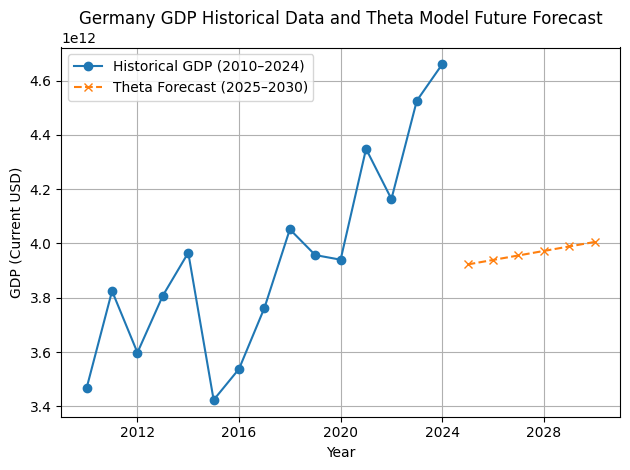

In [ ]:
theta_future_forecast = theta_model.forecast(steps=num_forecast_steps)

forecast_years_index = pd.to_datetime(range(start_year, end_year + 1), format='%Y')
theta_future_forecast.index = forecast_years_index

print("Germany Theta Model Future Forecast (2025–2030):")
print(theta_future_forecast)

plt.plot(germany_gdp_data.index, germany_gdp_data['GDP'], label='Historical GDP (2010–2024)', marker='o')
plt.plot(theta_future_forecast.index, theta_future_forecast.values,
         label='Theta Forecast (2025–2030)', linestyle='--', marker='x')
plt.title('Germany GDP Historical Data and Theta Model Future Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ARIMA

In [ ]:
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    mape, mae, r2 = evaluate_arima(germany_train_data, germany_test_data, order)
    if mape != float('inf'):
        print(f"ARIMA{order} MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
        if mape < best_mape:
            best_mape = mape
            best_order = order
            best_metrics = (mape, mae, r2)
print("Best Model:")
print(f"ARIMA{best_order} MAPE: {best_metrics[0]:.3f} "
      f"MAE: {best_metrics[1]:.3f} R2: {best_metrics[2]:.3f}")

ARIMA(0, 0, 0) MAPE: 13.273 MAE: 587691144988.972 R2: -5.279
ARIMA(0, 0, 1) MAPE: 13.090 MAE: 580484857680.314 R2: -5.239
ARIMA(0, 0, 2) MAPE: 15.031 MAE: 660312628700.930 R2: -6.369
ARIMA(0, 0, 3) MAPE: 1006492476737762551824188964864.000 MAE: 41061008506853318193560098410772360593408.000 R2: -69173874207515447291226251165624007135859278882838421700608.000
ARIMA(0, 0, 4) MAPE: 14.907 MAE: 658302517898.949 R2: -6.715
ARIMA(0, 0, 5) MAPE: 13.860 MAE: 610849259640.608 R2: -5.462
ARIMA(0, 1, 0) MAPE: 8.405 MAE: 377152066356.786 R2: -2.096
ARIMA(0, 1, 1) MAPE: 9.801 MAE: 437991823926.521 R2: -2.932
ARIMA(0, 1, 2) MAPE: 16739.770 MAE: 705964505383875.000 R2: -9349031.036
ARIMA(0, 1, 3) MAPE: 9.656 MAE: 430240083936.739 R2: -2.659
ARIMA(0, 1, 4) MAPE: 8.405 MAE: 377153178185.625 R2: -2.096
ARIMA(0, 1, 5) MAPE: 12.026 MAE: 533632181446.569 R2: -4.313
ARIMA(0, 2, 0) MAPE: 14.661 MAE: 654727036835.703 R2: -7.764
ARIMA(0, 2, 1) MAPE: 6.782 MAE: 303959605704.408 R2: -0.995
ARIMA(0, 2, 2) MAPE: 12

MAPE: 2.47%
R2: 0.76
MAE: 103496701658.37


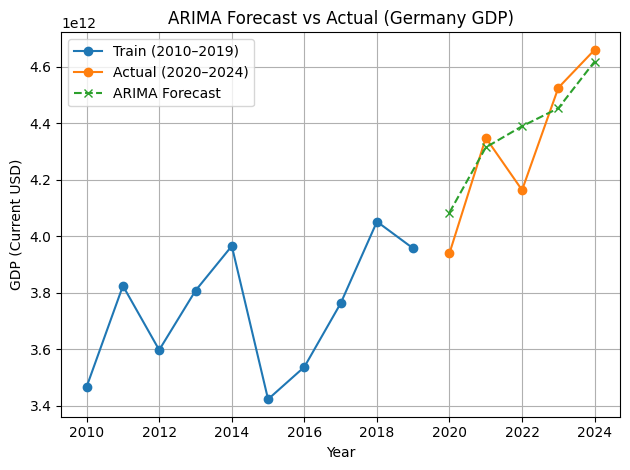

In [ ]:
germany_arima_model = ARIMA(germany_train_data, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
germany_arima_model_fit = germany_arima_model.fit()
germany_predictions = germany_arima_model_fit.forecast(steps=len(germany_test_data))
germany_mape = mean_absolute_percentage_error(germany_test_data, germany_predictions)
germany_r2 = r2_score(germany_test_data, germany_predictions)
germany_mae = mean_absolute_error(germany_test_data, germany_predictions)
print(f'MAPE: {germany_mape:.2f}%')
print(f'R2: {germany_r2:.2f}')
print(f'MAE: {germany_mae:.2f}')
plt.plot(germany_train_data.index, germany_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(germany_test_data.index, germany_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(germany_predictions.index, germany_predictions, label='ARIMA Forecast', linestyle='--', marker='x')
plt.title("ARIMA Forecast vs Actual (Germany GDP)")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

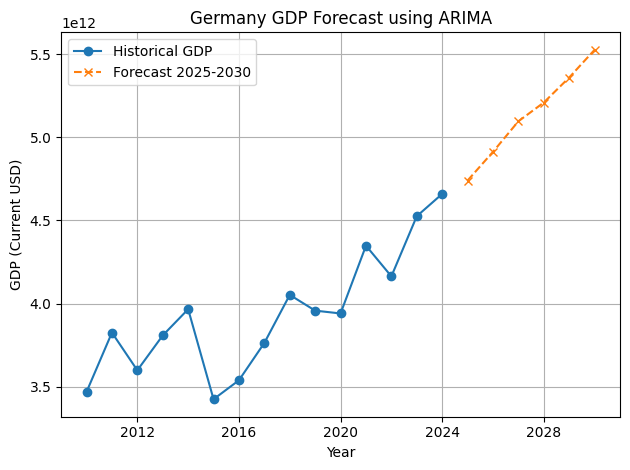

,predicted_mean
2025,4.740828e+12
2026,4.913451e+12
2027,5.097296e+12
2028,5.210204e+12
2029,5.361052e+12
2030,5.527850e+12


In [ ]:
germany_gdp_forecast = forecast_gdp(germany_gdp_data, best_order, 'Germany')
germany_gdp_forecast

### BSTS

In [ ]:
germany_gdp_data_series = germany_gdp_data['GDP']
germany_train_data_bsts = germany_gdp_data_series.loc[:'2019'].asfreq('YS')
germany_test_data_bsts = germany_gdp_data_series.loc['2020':].asfreq('YS')

print("Germany Training Data for BSTS (2010-2019):")
print(germany_train_data_bsts.head())
print("\nGermany Testing Data for BSTS (2020-2024):")
print(germany_test_data_bsts.head())

Germany Training Data for BSTS (2010-2019):
year
2010-01-01    3.468154e+12
2011-01-01    3.824829e+12
2012-01-01    3.597897e+12
2013-01-01    3.808086e+12
2014-01-01    3.965801e+12
Freq: YS-JAN, Name: GDP, dtype: float64

Germany Testing Data for BSTS (2020-2024):
year
2020-01-01    3.940143e+12
2021-01-01    4.348297e+12
2022-01-01    4.163596e+12
2023-01-01    4.525704e+12
2024-01-01    4.659929e+12
Freq: YS-JAN, Name: GDP, dtype: float64


In [ ]:
best_bsts_mape = float('inf')
best_bsts_params = None
best_bsts_metrics = (float('inf'), float('inf'), float('-inf'))

print("Starting BSTS hyperparameter tuning...")

for s_period in season_periods:
    for s_filter in state_filters:
        if s_filter == 'mcmc':
            for steps_val in mcmc_steps:
                params = {
                    'season_periods': s_period,
                    'state_filter': s_filter,
                    'steps': steps_val
                }
                mape, mae, r2 = evaluate_bsts_model(germany_train_data_bsts, germany_test_data_bsts, params)
                if mape != float('inf'):
                    print(f"BSTS(Filter={s_filter}, Steps={steps_val}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
                if mape < best_bsts_mape:
                    best_bsts_mape = mape
                    best_bsts_params = params
                    best_bsts_metrics = (mape, mae, r2)
        else:
            params = {
                'season_periods': s_period,
                'state_filter': s_filter,
                'steps': None
            }
            mape, mae, r2 = evaluate_bsts_model(germany_train_data_bsts, germany_test_data_bsts, params)
            if mape != float('inf'):
                print(f"BSTS(Filter={s_filter}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
            if mape < best_bsts_mape:
                best_bsts_mape = mape
                best_bsts_params = params
                best_bsts_metrics = (mape, mae, r2)

print("\nBSTS Hyperparameter Tuning Complete.")
print("\nBest BSTS Model:")
print(f"Parameters: {best_bsts_params}")
print(f"MAPE: {best_bsts_metrics[0]:.3f} MAE: {best_bsts_metrics[1]:.3f} R2: {best_bsts_metrics[2]:.3f}")


Starting BSTS hyperparameter tuning...
BSTS(Filter=kalman) MAPE: 11.622 MAE: 516496994911.395 R2: -4.077
BSTS(Filter=mcmc, Steps=500) MAPE: 11.622 MAE: 516496994911.395 R2: -4.077
BSTS(Filter=mcmc, Steps=1000) MAPE: 11.622 MAE: 516496994911.395 R2: -4.077

BSTS Hyperparameter Tuning Complete.

Best BSTS Model:
Parameters: {'season_periods': 1, 'state_filter': 'kalman', 'steps': None}
MAPE: 11.622 MAE: 516496994911.395 R2: -4.077


Best BSTS model evaluation on Germany test set:
MAPE: 11.622
MAE:  516496994911.395
R2:   -4.077


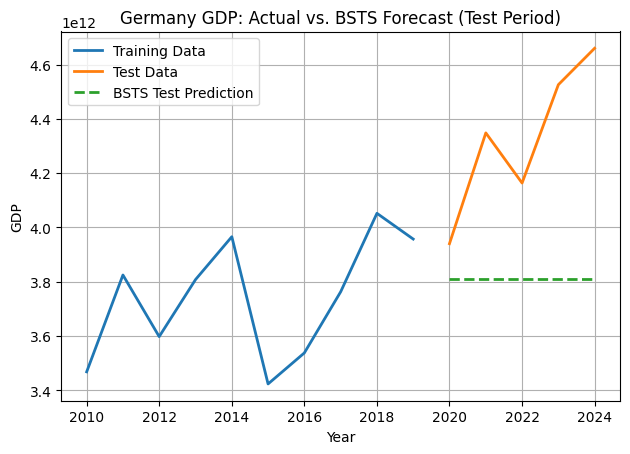

In [ ]:
bsts_best_model = UnobservedComponents(
    germany_train_data_bsts,
    level="local level"
)

bsts_best_fit = bsts_best_model.fit(
    maxiter=1000,
    disp=False
)

test_forecast = bsts_best_fit.forecast(
    steps=len(germany_test_data_bsts)
)

best_bsts_mape = mean_absolute_percentage_error(germany_test_data_bsts, test_forecast)
best_bsts_mae = mean_absolute_error(germany_test_data_bsts, test_forecast)
best_bsts_r2 = r2_score(germany_test_data_bsts, test_forecast)

print("Best BSTS model evaluation on Germany test set:")
print(f"MAPE: {best_bsts_mape:.3f}")
print(f"MAE:  {best_bsts_mae:.3f}")
print(f"R2:   {best_bsts_r2:.3f}")
plt.plot(germany_train_data_bsts.index, germany_train_data_bsts.values, label="Training Data", linewidth=2)
plt.plot(germany_test_data_bsts.index, germany_test_data_bsts.values, label="Test Data", linewidth=2)
plt.plot(germany_test_data_bsts.index, test_forecast.values,
         label="BSTS Test Prediction", linestyle="--", linewidth=2)

plt.title("Germany GDP: Actual vs. BSTS Forecast (Test Period)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



            Forecast_GDP      Lower_CI      Upper_CI
2025-01-01  4.603151e+12  3.828719e+12  5.377584e+12
2026-01-01  4.603151e+12  3.637968e+12  5.568334e+12
2027-01-01  4.603151e+12  3.479136e+12  5.727167e+12
2028-01-01  4.603151e+12  3.340122e+12  5.866180e+12
2029-01-01  4.603151e+12  3.214960e+12  5.991343e+12
2030-01-01  4.603151e+12  3.100185e+12  6.106117e+12


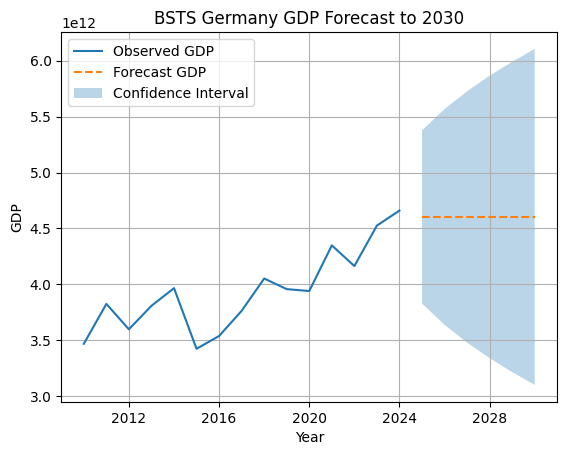

In [ ]:
germany_full_data_bsts = pd.concat(
    [germany_train_data_bsts, germany_test_data_bsts]
)

bsts_final_model = UnobservedComponents(
    germany_full_data_bsts,
    level="local level"
)

bsts_final_fit = bsts_final_model.fit(
    maxiter=1000,
    disp=False
)

last_year = germany_full_data_bsts.index[-1].year
forecast_horizon = 2030 - last_year

forecast_results = bsts_final_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

forecast_years = pd.date_range(
    start=germany_full_data_bsts.index[-1] + pd.DateOffset(years=1),
    periods=forecast_horizon,
    freq="YS"
)

forecast_df = pd.DataFrame({
    "Forecast_GDP": forecast_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
}, index=forecast_years)
print(forecast_df)
plt.plot(germany_full_data_bsts, label="Observed GDP")
plt.plot(forecast_df["Forecast_GDP"], label="Forecast GDP", linestyle="--")
plt.fill_between(
    forecast_df.index,
    forecast_df["Lower_CI"],
    forecast_df["Upper_CI"],
    alpha=0.3,
    label="Confidence Interval"
)
plt.legend()
plt.title("BSTS Germany GDP Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()




In [ ]:
germany_metrics_data = {
    'Model': ['Theta', 'ARIMA', 'BSTS'],
    'MAPE': [theta_mape, germany_mape, best_bsts_mape],
    'MAE': [theta_mae,  germany_mae, best_bsts_mae],
    'R2': [theta_r2, germany_r2, best_bsts_r2]
}

germany_comparison_df = pd.DataFrame(germany_metrics_data)
germany_comparison_df

,Model,MAPE,MAE,R2
0,Theta,8.294452,3.717747e+11,-1.957199
1,ARIMA,2.469129,1.034967e+11,0.755739
2,BSTS,11.621627,5.164970e+11,-4.077333


## United Kingdom

In [ ]:
uk_gdp_data = cleaned_df[cleaned_df['country_name'] == 'United Kingdom'][['year', 'GDP (Current USD)']].copy()
uk_gdp_data['year'] = pd.to_datetime(uk_gdp_data['year'], format='%Y')
uk_gdp_data = uk_gdp_data.set_index('year').sort_index()
uk_gdp_data.rename(columns={'GDP (Current USD)': 'GDP'}, inplace=True)
uk_gdp_data

,GDP
year,
2010-01-01,2.485483e+12
2011-01-01,2.663806e+12
2012-01-01,2.707090e+12
2013-01-01,2.784854e+12
2014-01-01,3.064708e+12
2015-01-01,2.927911e+12
2016-01-01,2.689107e+12
2017-01-01,2.680148e+12
2018-01-01,2.871340e+12


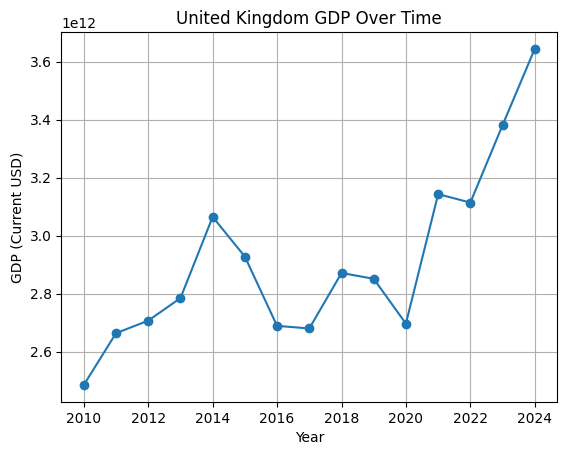

In [ ]:
plt.plot(uk_gdp_data.index, uk_gdp_data['GDP'], marker='o', linestyle='-')
plt.title('United Kingdom GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.grid(True)
plt.show()

In [ ]:
uk_train_data, uk_test_data = split_data(uk_gdp_data, 'GDP')

### Theta

Theta Model Performance for UK GDP:
  MAPE: 11.21%
  MAE: 373216326759.41
  R2: -0.84


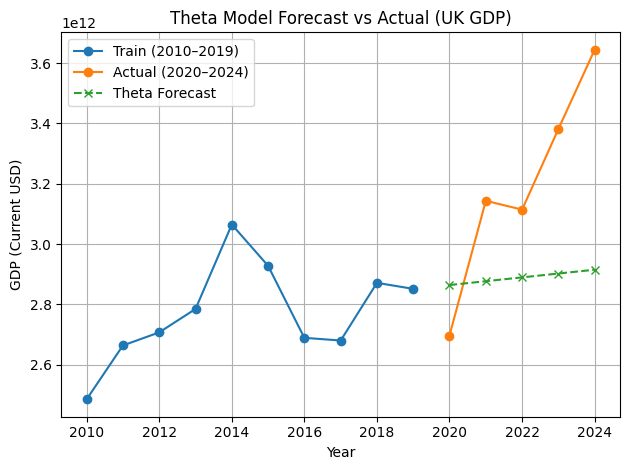

In [ ]:
uk_train_data_freq = uk_train_data.asfreq('YS')

theta_model = ThetaModel(uk_train_data_freq).fit()

theta_predictions = theta_model.forecast(len(uk_test_data))
theta_predictions.index = uk_test_data.index

theta_mape = mean_absolute_percentage_error(uk_test_data, theta_predictions)
theta_mae = mean_absolute_error(uk_test_data, theta_predictions)
theta_r2 = r2_score(uk_test_data, theta_predictions)

print(f'Theta Model Performance for UK GDP:')
print(f'  MAPE: {theta_mape:.2f}%')
print(f'  MAE: {theta_mae:.2f}')
print(f'  R2: {theta_r2:.2f}')

plt.plot(uk_train_data.index, uk_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(uk_test_data.index, uk_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(theta_predictions.index, theta_predictions, label='Theta Forecast', linestyle='--', marker='x')
plt.title('Theta Model Forecast vs Actual (UK GDP)')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


UK Theta Model Future Forecast (2025–2030):
2025-01-01    2.864102e+12
2026-01-01    2.876791e+12
2027-01-01    2.889480e+12
2028-01-01    2.902168e+12
2029-01-01    2.914857e+12
2030-01-01    2.927546e+12
Name: forecast, dtype: float64


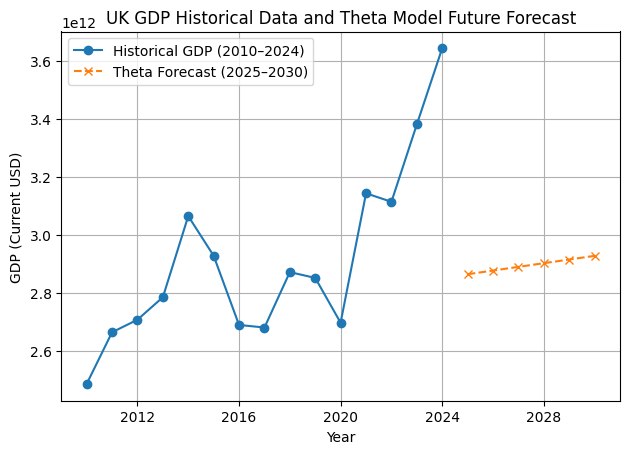

In [ ]:
theta_future_forecast = theta_model.forecast(steps=num_forecast_steps)

forecast_years_index = pd.to_datetime(range(start_year, end_year + 1), format='%Y')
theta_future_forecast.index = forecast_years_index

print("UK Theta Model Future Forecast (2025–2030):")
print(theta_future_forecast)

plt.plot(uk_gdp_data.index, uk_gdp_data['GDP'], label='Historical GDP (2010–2024)', marker='o')
plt.plot(theta_future_forecast.index, theta_future_forecast.values,
         label='Theta Forecast (2025–2030)', linestyle='--', marker='x')
plt.title('UK GDP Historical Data and Theta Model Future Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (Current USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ARIMA

In [ ]:
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    mape, mae, r2 = evaluate_arima(uk_train_data, uk_test_data, order)
    if mape != float('inf'):
        print(f"ARIMA{order} MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
        if mape < best_mape:
            best_mape = mape
            best_order = order
            best_metrics = (mape, mae, r2)
print("Best Model:")
print(f"ARIMA{best_order} MAPE: {best_metrics[0]:.3f} MAE: {best_metrics[1]:.3f} R2: {best_metrics[2]:.3f}")

ARIMA(0, 0, 0) MAPE: 13.494 MAE: 453503978123.828 R2: -1.815
ARIMA(0, 0, 1) MAPE: 13.524 MAE: 454288657338.734 R2: -1.816
ARIMA(0, 0, 2) MAPE: 13.330 MAE: 449367339418.856 R2: -1.824
ARIMA(0, 0, 3) MAPE: 56127947120302578579307233280.000 MAE: 1605142525537194301726386070163306840064.000 R2: -67814265864266513843935473496806709688081889959255998464.000
ARIMA(0, 0, 4) MAPE: 13.778 MAE: 461398424568.175 R2: -1.834
ARIMA(0, 0, 5) MAPE: 13.454 MAE: 452417247575.538 R2: -1.813
ARIMA(0, 1, 0) MAPE: 12.172 MAE: 406210870022.604 R2: -1.202
ARIMA(0, 1, 1) MAPE: 13.959 MAE: 470126621822.849 R2: -2.060
ARIMA(0, 1, 2) MAPE: 12.764 MAE: 427739955150.896 R2: -1.477
ARIMA(0, 1, 3) MAPE: 13.771 MAE: 463938994982.835 R2: -1.988
ARIMA(0, 1, 4) MAPE: 12.172 MAE: 406213240598.561 R2: -1.202
ARIMA(0, 1, 5) MAPE: 13.021 MAE: 436538412945.542 R2: -1.580
ARIMA(0, 2, 0) MAPE: 13.681 MAE: 458037144974.952 R2: -1.835
ARIMA(0, 2, 1) MAPE: 10.359 MAE: 343905611058.600 R2: -0.557
ARIMA(0, 2, 2) MAPE: 197579920778058

MAPE: 14.40%
R2: -2.45
MAE: 487189949659.37


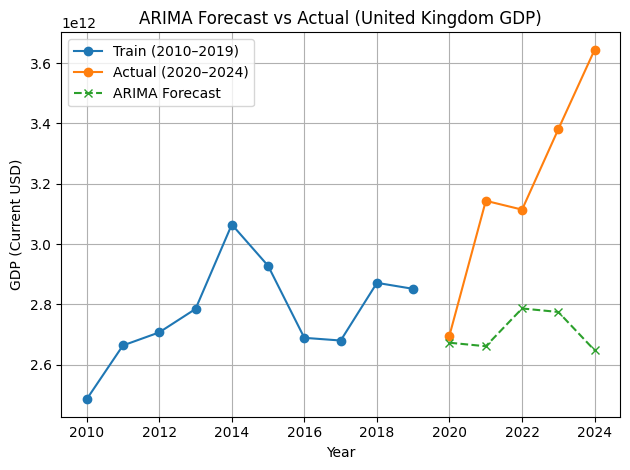

In [ ]:
uk_arima_model = ARIMA(uk_train_data, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
uk_arima_model_fit = uk_arima_model.fit()
uk_predictions = uk_arima_model_fit.forecast(steps=len(uk_test_data))
uk_mape = mean_absolute_percentage_error(uk_test_data, uk_predictions)
uk_r2 = r2_score(uk_test_data, uk_predictions)
uk_mae = mean_absolute_error(uk_test_data, uk_predictions)
print(f'MAPE: {uk_mape:.2f}%')
print(f'R2: {uk_r2:.2f}')
print(f'MAE: {uk_mae:.2f}')
plt.plot(uk_train_data.index, uk_train_data.values, label='Train (2010–2019)', marker='o')
plt.plot(uk_test_data.index, uk_test_data.values, label='Actual (2020–2024)', marker='o')
plt.plot(uk_predictions.index, uk_predictions, label='ARIMA Forecast', linestyle='--', marker='x')
plt.title("ARIMA Forecast vs Actual (United Kingdom GDP)")
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

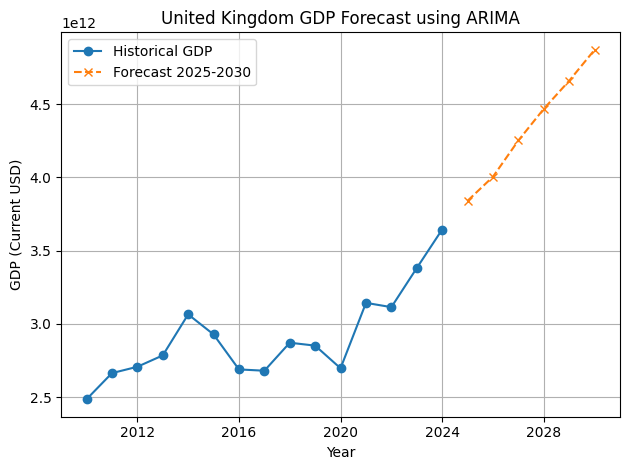

,predicted_mean
2025,3.840297e+12
2026,4.004326e+12
2027,4.251597e+12
2028,4.467160e+12
2029,4.659357e+12
2030,4.870460e+12


In [ ]:
uk_gdp_forecast = forecast_gdp(uk_gdp_data, best_order, 'United Kingdom')
uk_gdp_forecast

### BSTS

In [ ]:
uk_gdp_data_series = uk_gdp_data['GDP']
uk_train_data_bsts = uk_gdp_data_series.loc[:'2019'].asfreq('YS')
uk_test_data_bsts = uk_gdp_data_series.loc['2020':].asfreq('YS')

print("UK Training Data for BSTS (2010-2019):")
print(uk_train_data_bsts.head())
print("\nUK Testing Data for BSTS (2020-2024):")
print(uk_test_data_bsts.head())


UK Training Data for BSTS (2010-2019):
year
2010-01-01    2.485483e+12
2011-01-01    2.663806e+12
2012-01-01    2.707090e+12
2013-01-01    2.784854e+12
2014-01-01    3.064708e+12
Freq: YS-JAN, Name: GDP, dtype: float64

UK Testing Data for BSTS (2020-2024):
year
2020-01-01    2.696778e+12
2021-01-01    3.143323e+12
2022-01-01    3.114042e+12
2023-01-01    3.380855e+12
2024-01-01    3.643834e+12
Freq: YS-JAN, Name: GDP, dtype: float64


In [ ]:
best_bsts_mape = float('inf')
best_bsts_params = None
best_bsts_metrics = (float('inf'), float('inf'), float('-inf'))

print("Starting BSTS hyperparameter tuning...")

for s_period in season_periods:
    for s_filter in state_filters:
        if s_filter == 'mcmc':
            for steps_val in mcmc_steps:
                params = {
                    'season_periods': s_period,
                    'state_filter': s_filter,
                    'steps': steps_val
                }
                mape, mae, r2 = evaluate_bsts_model(uk_train_data_bsts, uk_test_data_bsts, params)
                if mape != float('inf'):
                    print(f"BSTS(Filter={s_filter}, Steps={steps_val}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
                if mape < best_bsts_mape:
                    best_bsts_mape = mape
                    best_bsts_params = params
                    best_bsts_metrics = (mape, mae, r2)
        else:
            params = {
                'season_periods': s_period,
                'state_filter': s_filter,
                'steps': None
            }
            mape, mae, r2 = evaluate_bsts_model(uk_train_data_bsts, uk_test_data_bsts, params)
            if mape != float('inf'):
                print(f"BSTS(Filter={s_filter}) MAPE: {mape:.3f} MAE: {mae:.3f} R2: {r2:.3f}")
            if mape < best_bsts_mape:
                best_bsts_mape = mape
                best_bsts_params = params
                best_bsts_metrics = (mape, mae, r2)

print("\nBSTS Hyperparameter Tuning Complete.")
print("\nBest BSTS Model:")
print(f"Parameters: {best_bsts_params}")
print(f"MAPE: {best_bsts_metrics[0]:.3f} MAE: {best_bsts_metrics[1]:.3f} R2: {best_bsts_metrics[2]:.3f}")


Starting BSTS hyperparameter tuning...
BSTS(Filter=kalman) MAPE: 13.260 MAE: 445107779769.808 R2: -1.697
BSTS(Filter=mcmc, Steps=500) MAPE: 13.260 MAE: 445107779769.808 R2: -1.697
BSTS(Filter=mcmc, Steps=1000) MAPE: 13.260 MAE: 445107779769.808 R2: -1.697

BSTS Hyperparameter Tuning Complete.

Best BSTS Model:
Parameters: {'season_periods': 1, 'state_filter': 'kalman', 'steps': None}
MAPE: 13.260 MAE: 445107779769.808 R2: -1.697


Best BSTS model evaluation on UK test set:
MAPE: 13.260
MAE:  445107779769.808
R2:   -1.697


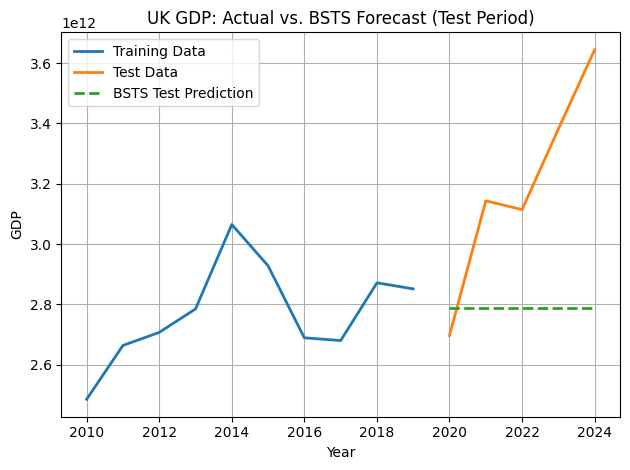

In [ ]:
bsts_best_model = UnobservedComponents(
    uk_train_data_bsts,
    level="local level"
)

bsts_best_fit = bsts_best_model.fit(
    maxiter=1000,
    disp=False
)

test_forecast = bsts_best_fit.forecast(
    steps=len(uk_test_data_bsts)
)

best_bsts_mape = mean_absolute_percentage_error(uk_test_data_bsts, test_forecast)
best_bsts_mae = mean_absolute_error(uk_test_data_bsts, test_forecast)
best_bsts_r2 = r2_score(uk_test_data_bsts, test_forecast)

print("Best BSTS model evaluation on UK test set:")
print(f"MAPE: {best_bsts_mape:.3f}")
print(f"MAE:  {best_bsts_mae:.3f}")
print(f"R2:   {best_bsts_r2:.3f}")
plt.plot(uk_train_data_bsts.index, uk_train_data_bsts.values, label="Training Data", linewidth=2)
plt.plot(uk_test_data_bsts.index, uk_test_data_bsts.values, label="Test Data", linewidth=2)
plt.plot(uk_test_data_bsts.index, test_forecast.values,
         label="BSTS Test Prediction", linestyle="--", linewidth=2)

plt.title("UK GDP: Actual vs. BSTS Forecast (Test Period)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


            Forecast_GDP      Lower_CI      Upper_CI
2025-01-01  3.531242e+12  2.876904e+12  4.185579e+12
2026-01-01  3.531242e+12  2.738302e+12  4.324182e+12
2027-01-01  3.531242e+12  2.620556e+12  4.441928e+12
2028-01-01  3.531242e+12  2.516380e+12  4.546104e+12
2029-01-01  3.531242e+12  2.421944e+12  4.640539e+12
2030-01-01  3.531242e+12  2.334941e+12  4.727543e+12


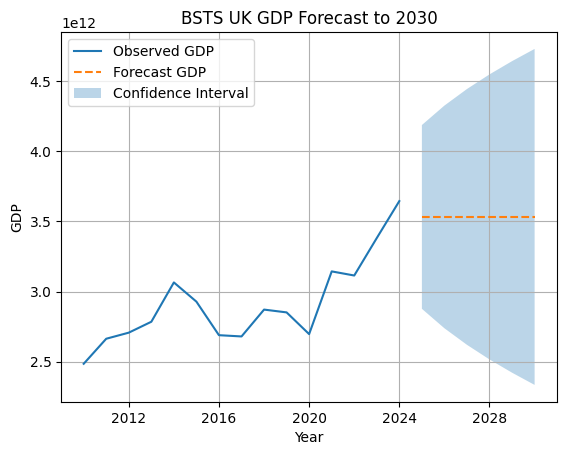

In [ ]:
uk_full_data_bsts = pd.concat(
    [uk_train_data_bsts, uk_test_data_bsts]
)

bsts_final_model = UnobservedComponents(
    uk_full_data_bsts,
    level="local level"
)

bsts_final_fit = bsts_final_model.fit(
    maxiter=1000,
    disp=False
)

last_year = uk_full_data_bsts.index[-1].year
forecast_horizon = 2030 - last_year

forecast_results = bsts_final_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

forecast_years = pd.date_range(
    start=uk_full_data_bsts.index[-1] + pd.DateOffset(years=1),
    periods=forecast_horizon,
    freq="YS"
)

forecast_df = pd.DataFrame({
    "Forecast_GDP": forecast_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
}, index=forecast_years)
print(forecast_df)
plt.plot(uk_full_data_bsts, label="Observed GDP")
plt.plot(forecast_df["Forecast_GDP"], label="Forecast GDP", linestyle="--")
plt.fill_between(
    forecast_df.index,
    forecast_df["Lower_CI"],
    forecast_df["Upper_CI"],
    alpha=0.3,
    label="Confidence Interval"
)
plt.legend()
plt.title("BSTS UK GDP Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()



In [ ]:
uk_metrics_data = {
    'Model': ['Theta', 'ARIMA', 'BSTS'],
    'MAPE': [theta_mape, uk_mape, best_bsts_mape],
    'MAE': [theta_mae,  uk_mae, best_bsts_mae],
    'R2': [theta_r2, uk_r2, best_bsts_r2]
}

uk_comparison_df = pd.DataFrame(uk_metrics_data)
uk_comparison_df

,Model,MAPE,MAE,R2
0,Theta,11.211936,3.732163e+11,-0.844220
1,ARIMA,14.402491,4.871899e+11,-2.445203
2,BSTS,13.259750,4.451078e+11,-1.696602


## Computing All the Evaluation Results

In [ ]:
us_comparison_df['Country'] = 'United States'
japan_comparison_df['Country'] = 'Japan'
uk_comparison_df['Country'] = 'United Kingdom'
china_comparison_df['Country'] = 'China'
germany_comparison_df['Country'] = 'Germany'

final_evaluation_results = pd.concat([us_comparison_df, japan_comparison_df, uk_comparison_df, china_comparison_df, germany_comparison_df], ignore_index=True)
final_evaluation_results

,Model,MAPE,MAE,R2,Country
0,Theta,11.791283,3.201612e+12,-0.811843,United States
1,ARIMA,2.353344,5.539430e+11,0.938505,United States
2,BSTS,15.129220,4.127773e+12,-2.097097,United States
3,Theta,10.181978,4.247499e+11,-0.491726,Japan
4,ARIMA,13.129283,5.477674e+11,1.466687,Japan
5,BSTS,13.131532,5.459928e+11,-1.545505,Japan
6,Theta,11.211936,3.732163e+11,-0.844220,United Kingdom
7,ARIMA,14.402491,4.871899e+11,-2.445203,United Kingdom
8,BSTS,13.259750,4.451078e+11,-1.696602,United Kingdom
9,Theta,10.080347,1.819082e+12,-1.156402,China
